Problem Statement:
Based on given data of visitors browsing for online shopping, build different clusters to know whether person is only browsing and visiting multiples pages or also generating revenue for the shoppers as well.  Analyse and compare the clusters formed with the existing Revenue Column.
Data Set Information:
The dataset consists of feature vectors belonging to 12,330 sessions.The dataset was formed so that each sessionwould belong to a different user in a 1-year period to avoidany tendency to a specific campaign, special day, userprofile, or period.
Attribute Information:
The dataset consists of 10 numerical and 8 categorical attributes.
The 'Revenue' attribute can be used as the class label.

"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. 
The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. 


Citation / Reference:
Please use the below link to cite this dataset:
Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput&Applic (2018).
https://link.springer.com/article/10.1007/s00521-018-3523-0
Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

Expected Approach/Outcomes:


In [1]:
# import library
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# 'Pandas' is used for data manipulation and analysis
import pandas as pd 

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt

# train test split
from sklearn.model_selection import train_test_split

# 'StandardScalar' from sklearn.preprocessing library is used to scale the data
from sklearn.preprocessing import StandardScaler

# 'eig' from numpy.linalg to calculate eigenvalues and eigenvectors
from numpy.linalg import eig

# 'PCA' function to perform principal component analysis using the sklearn library
from sklearn.decomposition import PCA

# 'LDA' function to perform linear discriminant analysis using the sklearn library
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# import decision tree classifier from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

plt.rcParams['figure.figsize'] = [15,8]
import seaborn as sns

In [2]:
# Read dataset
df=pd.read_csv("online_shoppers_intention.csv")
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


	Perform required cleaning to bring the uniformity in the data.


In [23]:
df.describe()

,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,80.818611,34.472398,1194.746220,0.022191,0.043073,5.889258
std,176.779107,140.749294,1913.669288,0.048488,0.048597,18.568437
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,184.137500,0.000000,0.014286,0.000000
50%,7.500000,0.000000,598.936905,0.003112,0.025156,0.000000
75%,93.256250,0.000000,1464.157214,0.016813,0.050000,0.000000
max,3398.750000,2549.375000,63973.522230,0.200000,0.200000,361.763742


In [3]:
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [18]:
df['Administrative']=df['Administrative'].astype(object)
df['Informational']=df['Informational'].astype(object)
df['ProductRelated']=df['ProductRelated'].astype(object)
df['OperatingSystems']=df['OperatingSystems'].astype(object)
df['Browser']=df['Browser'].astype(object)
df['Region']=df['Region'].astype(object)
df['TrafficType']=df['TrafficType'].astype(object)
df['SpecialDay']=df['SpecialDay'].astype(object)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  object 
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  object 
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  object 
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  object 
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  object 
 12  Browser                  12330 non-null  object 
 13  Region                   12330 non-null  object 
 14  TrafficType           

   Perform required missing value treatment


In [24]:
df.isnull().sum()/len(df)*100

Administrative             0.0
Administrative_Duration    0.0
Informational              0.0
Informational_Duration     0.0
ProductRelated             0.0
ProductRelated_Duration    0.0
BounceRates                0.0
ExitRates                  0.0
PageValues                 0.0
SpecialDay                 0.0
Month                      0.0
OperatingSystems           0.0
Browser                    0.0
Region                     0.0
TrafficType                0.0
VisitorType                0.0
Weekend                    0.0
Revenue                    0.0
dtype: float64

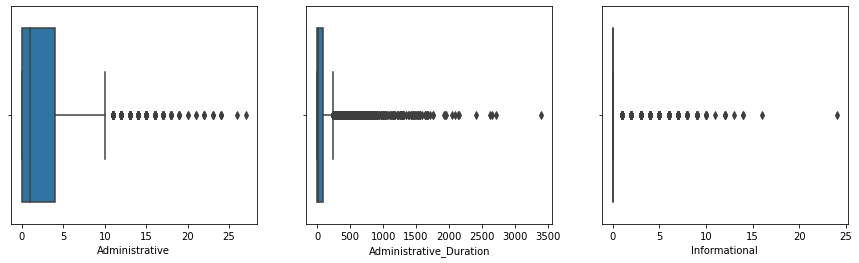

In [27]:
df_num = df.drop(['SpecialDay','Month','OperatingSystems','Browser','Region','TrafficType','VisitorType'], axis = 1)
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(15, 4))
for variable, subplot in zip(df_num.columns, ax.flatten()):
    sns.boxplot(df[variable], ax = subplot)
plt.show()

	Carry-out uni-variate, Bi-variate and Multti-varaiate analysis to understand the data relationships.


In [22]:
df['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [21]:
df['Browser'].value_counts()

2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64

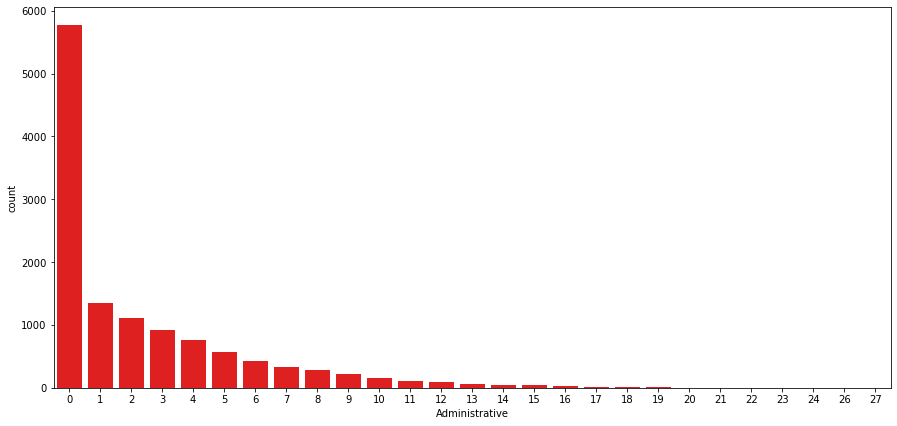

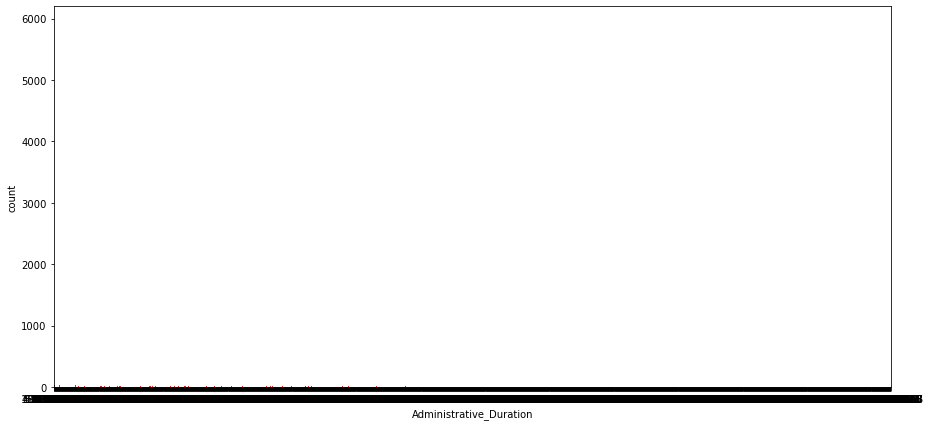

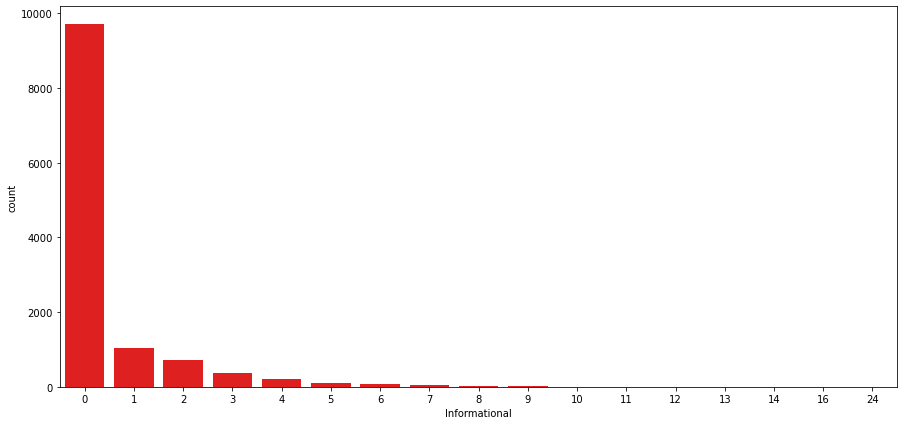

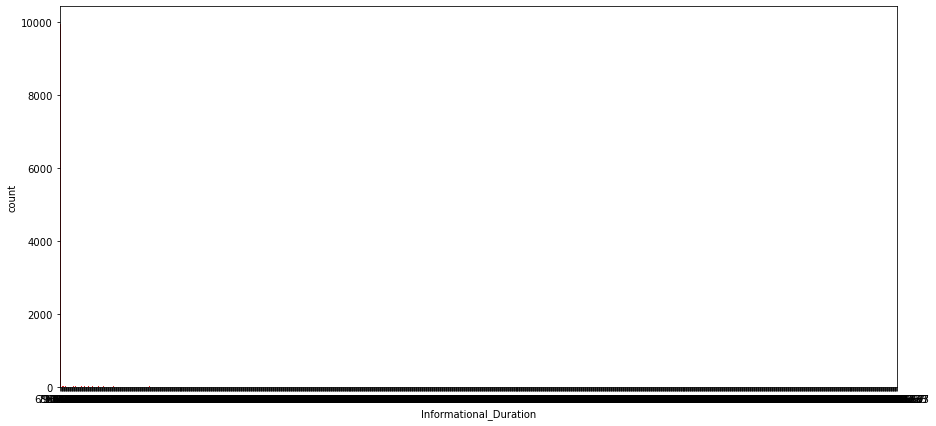

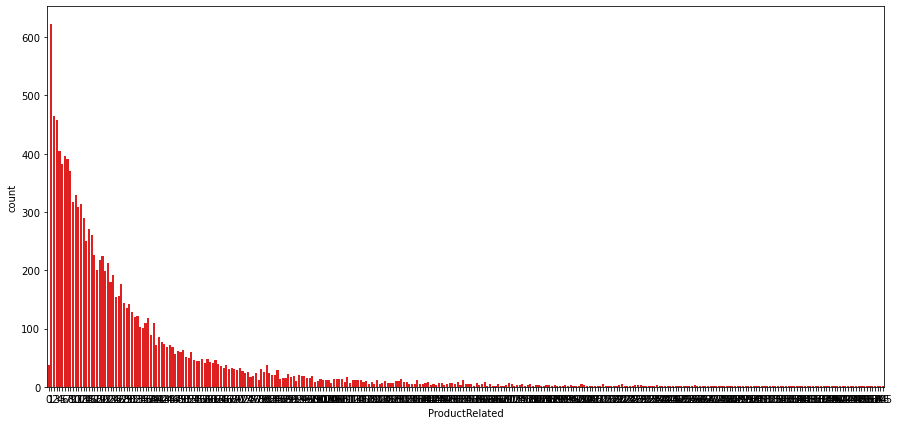

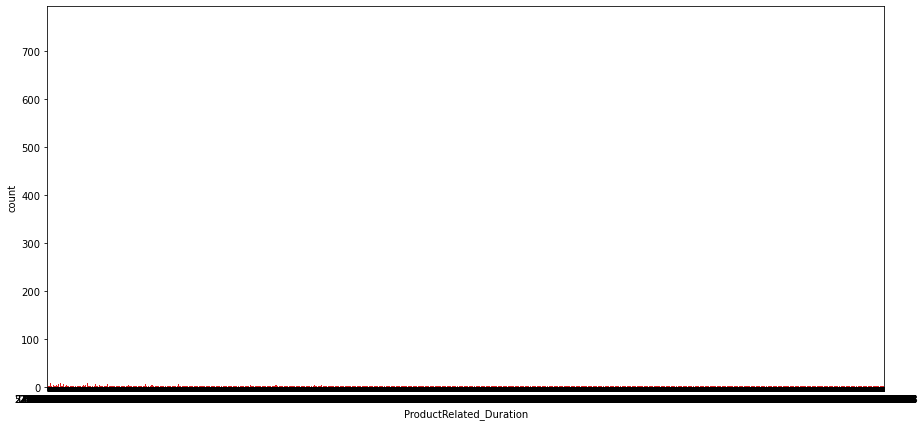

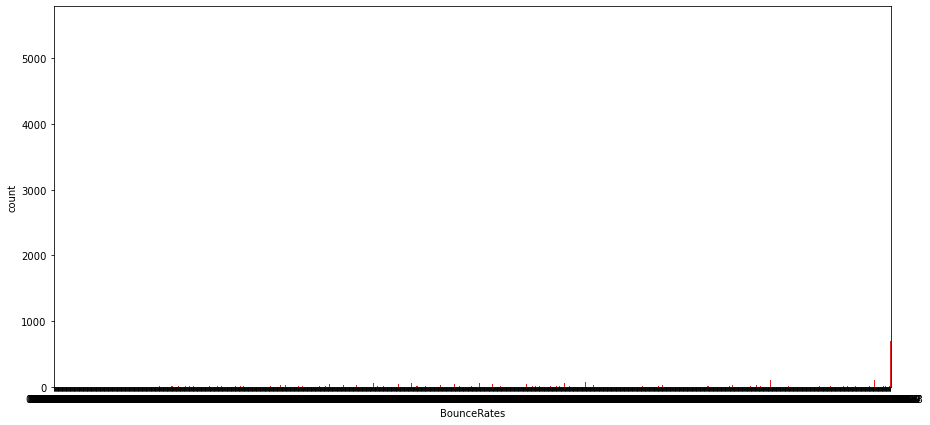

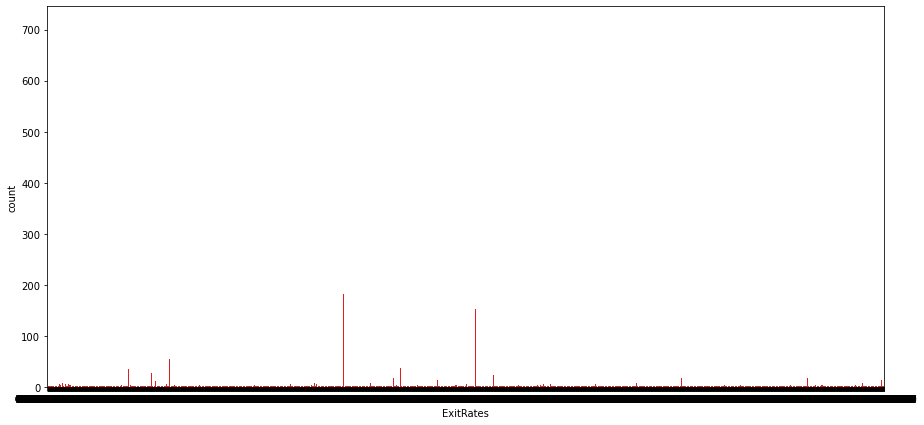

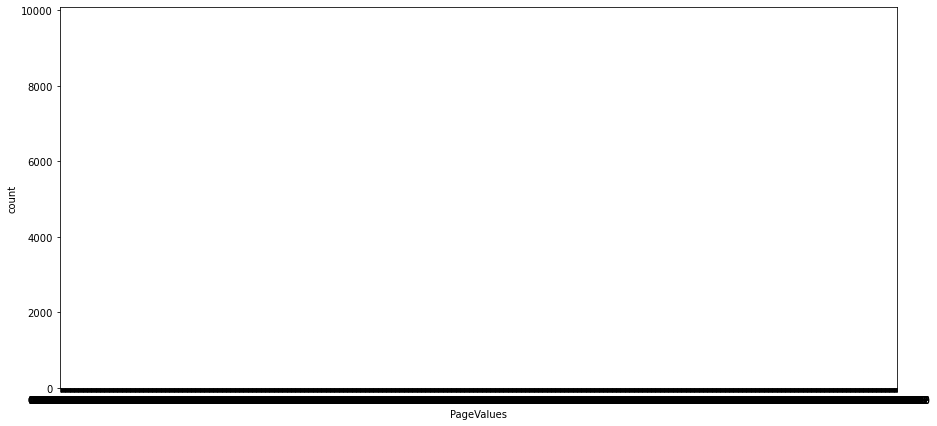

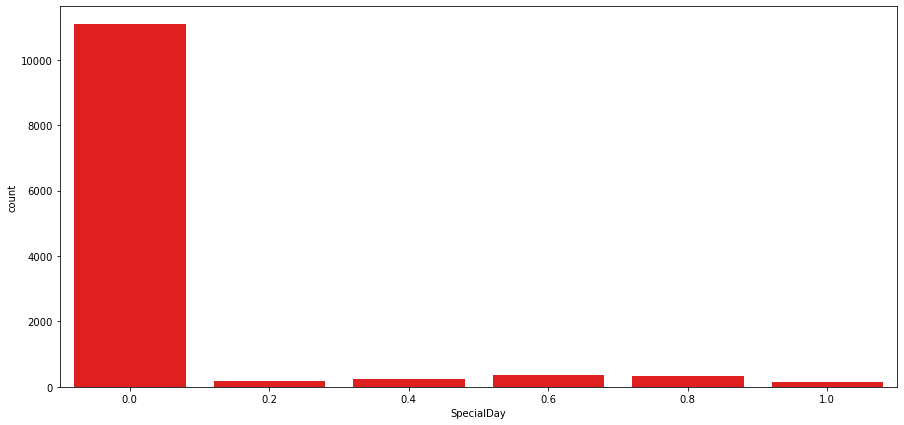

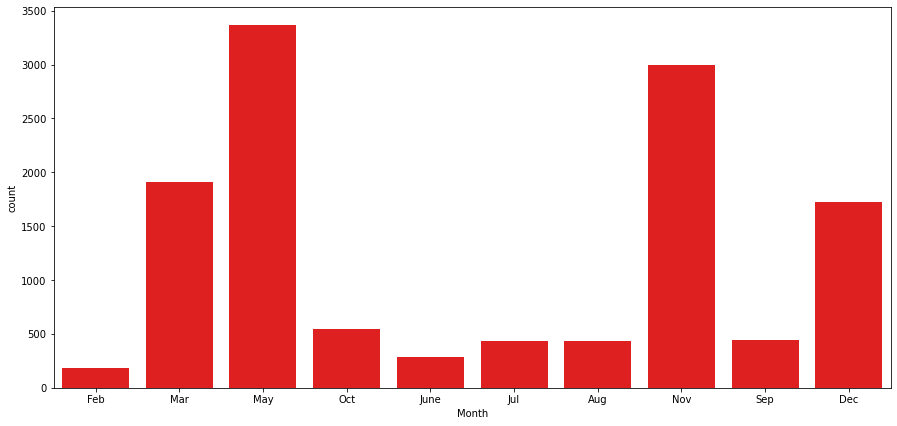

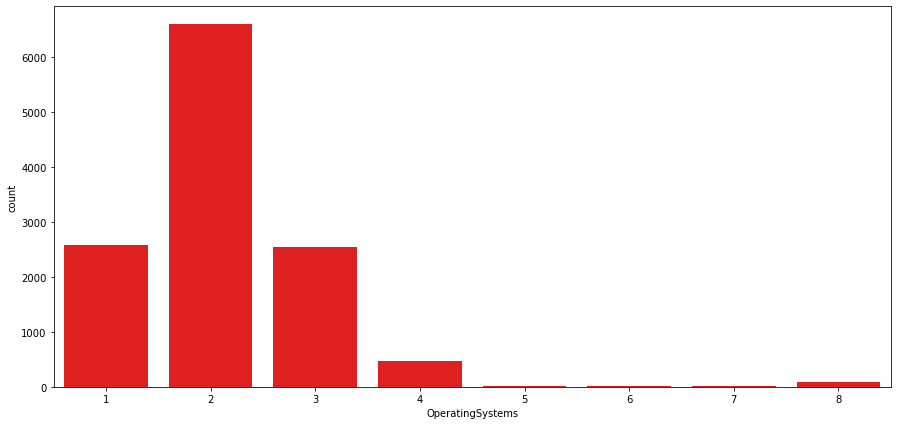

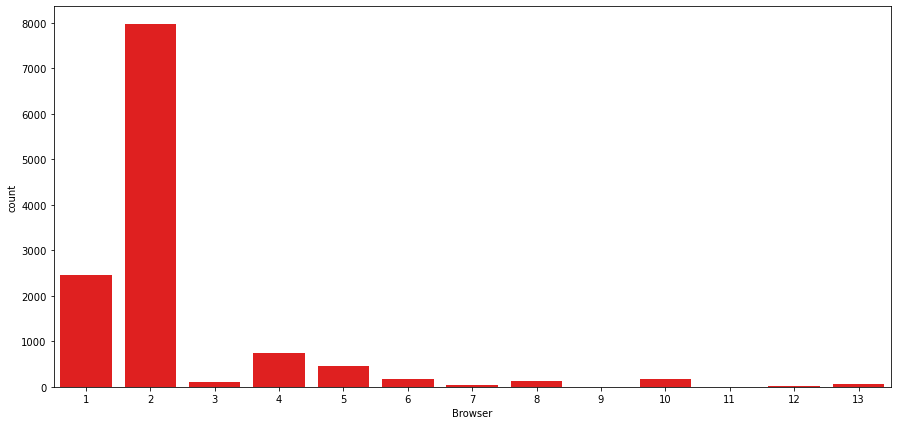

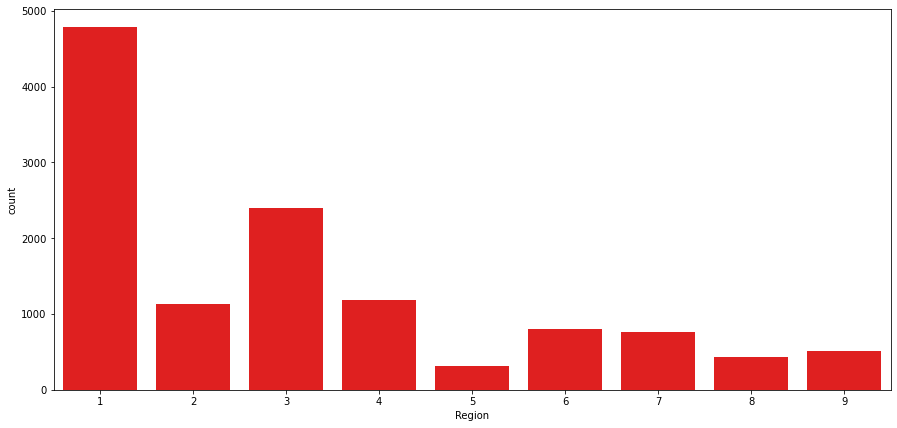

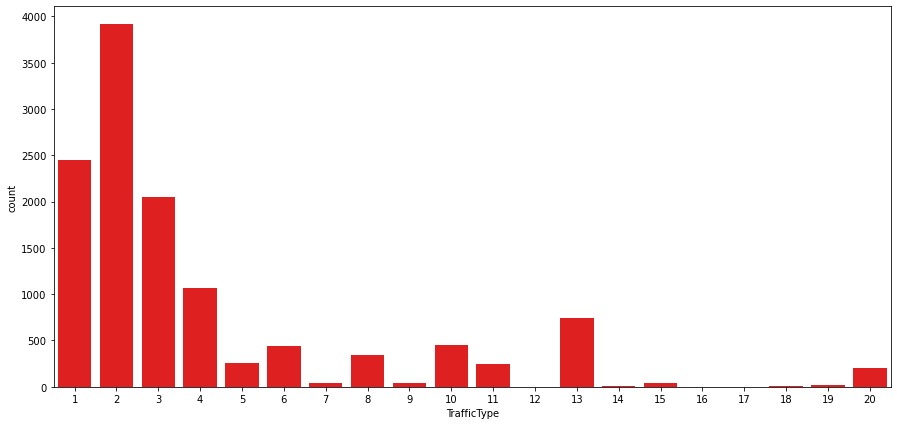

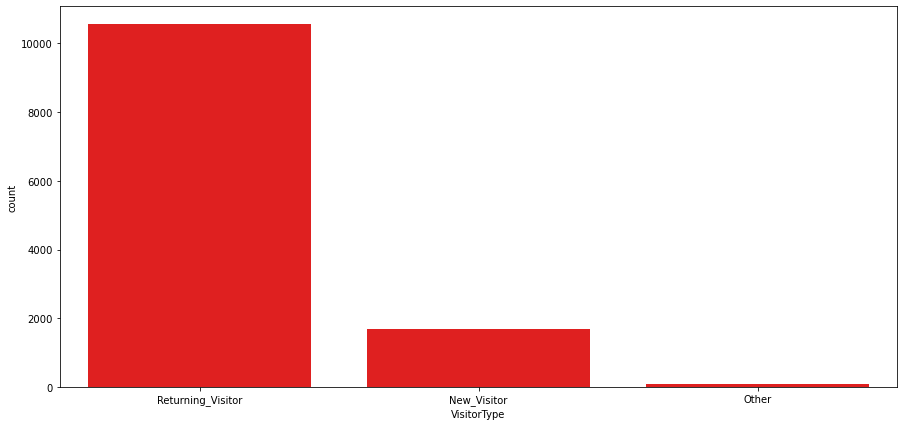

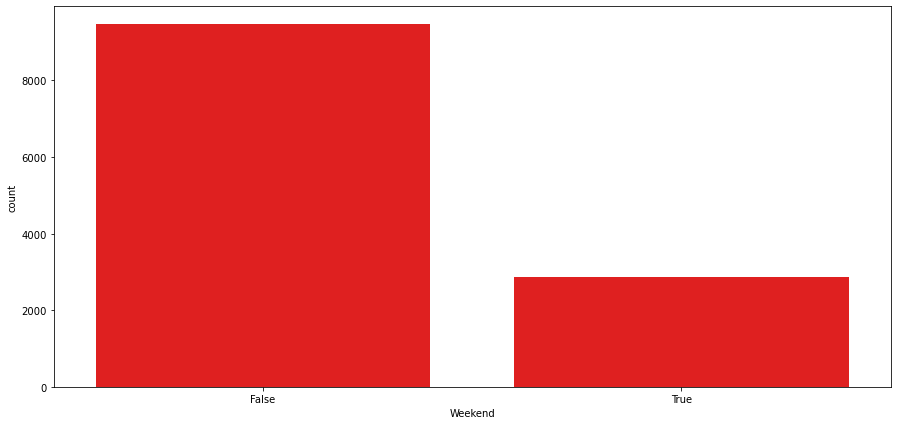

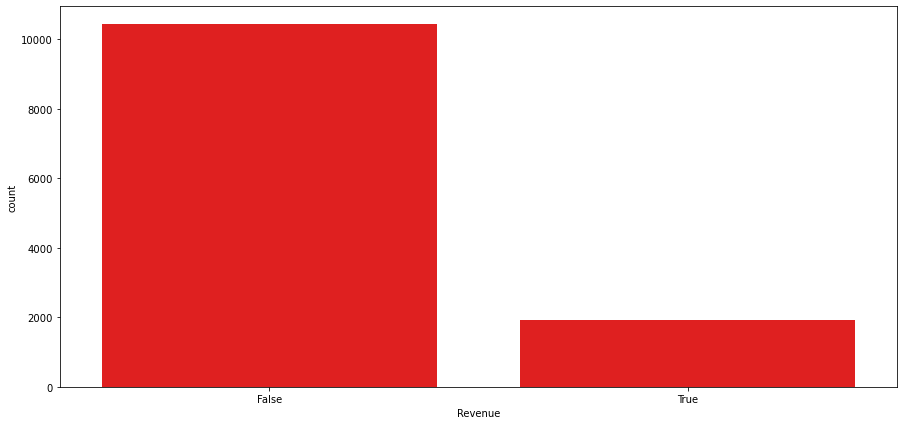

In [40]:
for i in df.columns:
    plt.figure(figsize = (15,7))
    sns.countplot(df[i], color = "red")
    plt.show()

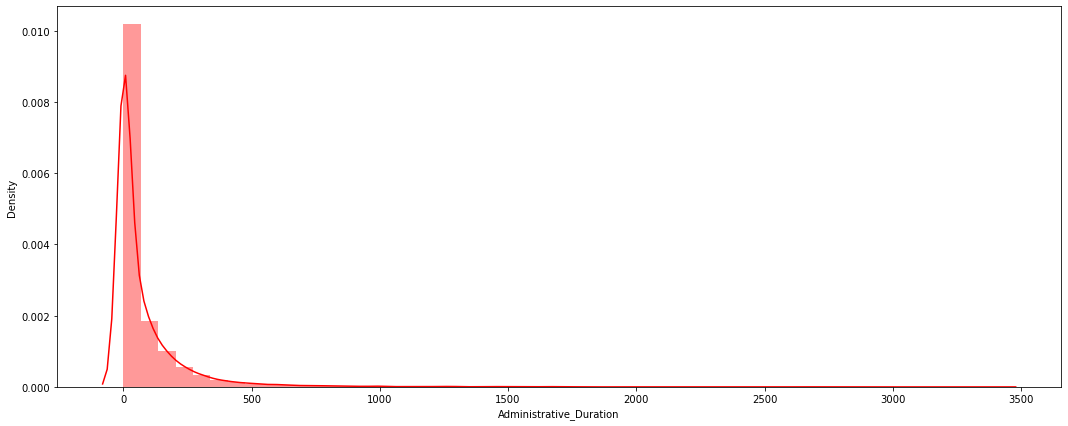

In [35]:
plt.figure(figsize = (18,7))
sns.distplot(df['Administrative_Duration'], color = "red")
plt.show()

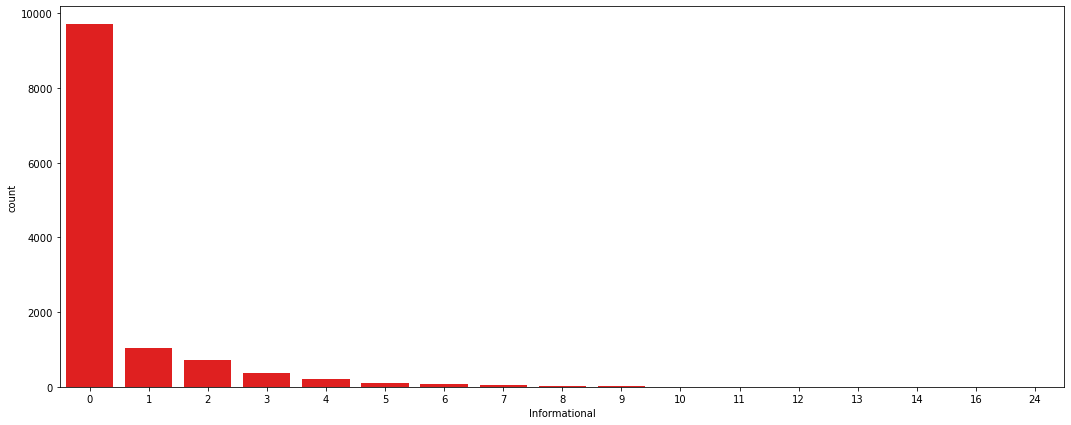

In [37]:
plt.figure(figsize = (18,7))
sns.countplot(df['Informational'], color = "red")
plt.show()

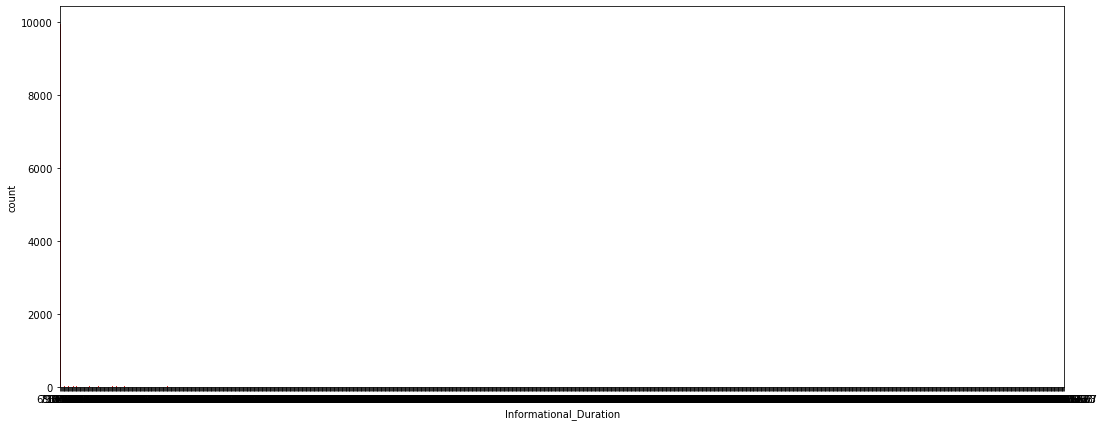

In [39]:
plt.figure(figsize = (18,7))
sns.countplot(df['Informational_Duration'], color = "red")
plt.show()


In [42]:
from sklearn.preprocessing import quantile_transform
import scipy.stats as stats
pro_duratn = quantile_transform(df[['ProductRelated_Duration']], output_distribution='normal',random_state=0, copy='warn').flatten()
inf_duration= quantile_transform(df[['Informational_Duration']], output_distribution='uniform',random_state=0, copy='warn').flatten()
adm_duration= quantile_transform(df[['Administrative_Duration']], output_distribution='normal',random_state=0, copy='warn').flatten()

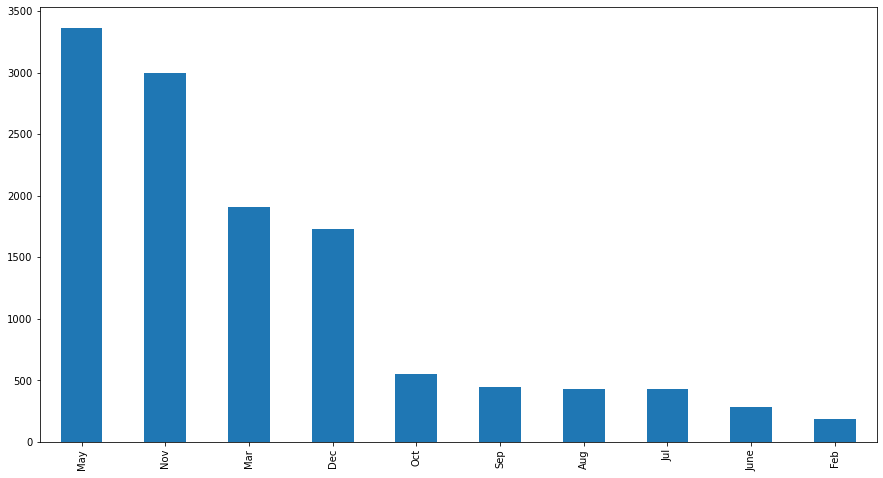

In [43]:
df['Month'].value_counts().plot(kind = "bar")
plt.xticks(rotation = 90)
plt.show()

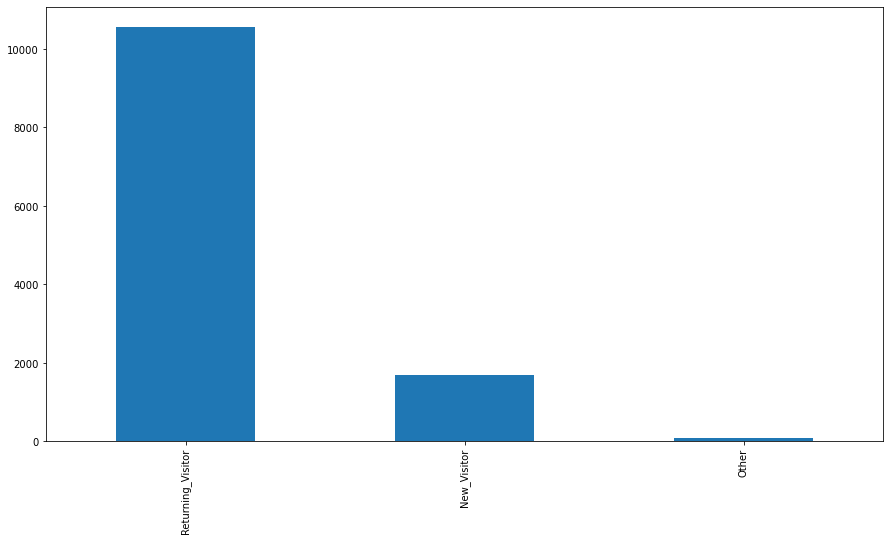

In [44]:
df['VisitorType'].value_counts().plot(kind = "bar")
plt.xticks(rotation = 90)
plt.show()


Checking the Distribution of customers on Revenue

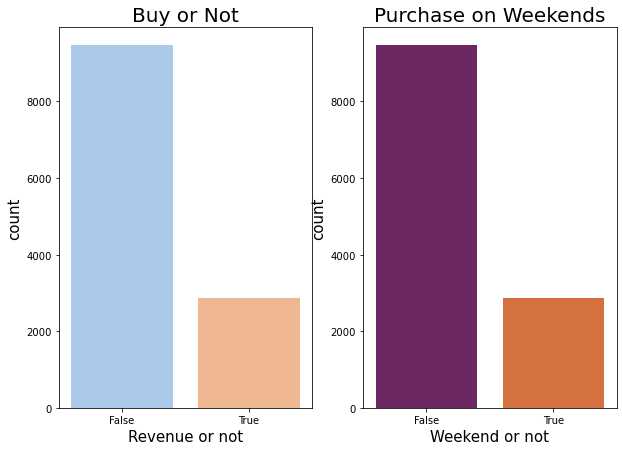

In [45]:
plt.figure(figsize = (10,7))

plt.subplot(1, 2, 1)
sns.countplot(df['Weekend'], palette = 'pastel')
plt.title('Buy or Not', fontsize = 20)
plt.xlabel('Revenue or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)

# checking the Distribution of customers on Weekend
plt.subplot(1, 2, 2)
sns.countplot(df['Weekend'], palette = 'inferno')
plt.title('Purchase on Weekends', fontsize = 20)
plt.xlabel('Weekend or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)

plt.show()

Bi-Variate Analysis


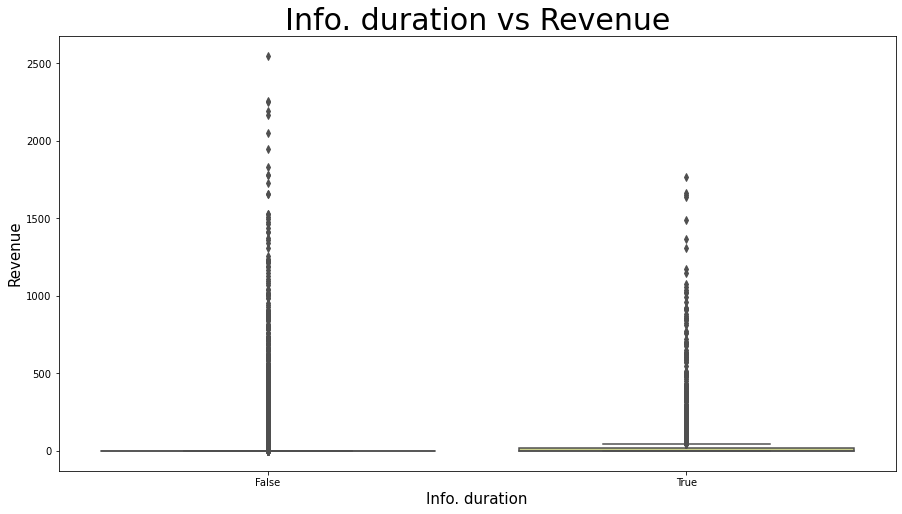

In [46]:
#Informational Duration vs revenue
sns.boxplot(df['Revenue'], df['Informational_Duration'], palette = 'rainbow')
plt.title('Info. duration vs Revenue', fontsize = 30)
plt.xlabel('Info. duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()

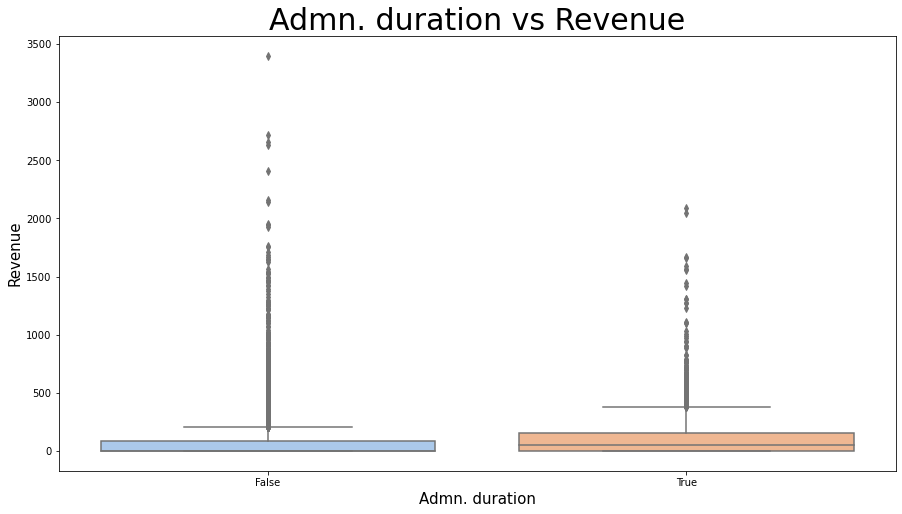

In [47]:
#Administrative Duration vs revenue
sns.boxplot(df['Revenue'], df['Administrative_Duration'], palette = 'pastel')
plt.title('Admn. duration vs Revenue', fontsize = 30)
plt.xlabel('Admn. duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()

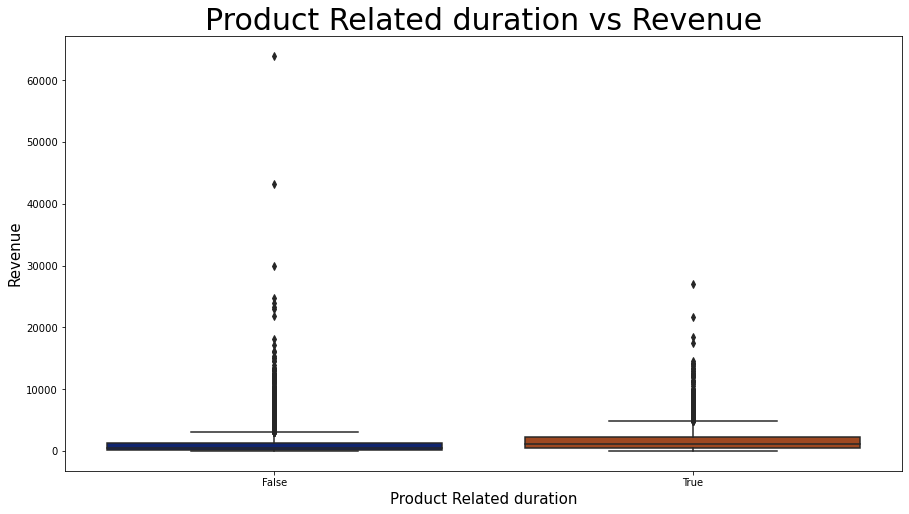

In [48]:
#Product related duration vs revenue
sns.boxplot(df['Revenue'], df['ProductRelated_Duration'], palette = 'dark')
plt.title('Product Related duration vs Revenue', fontsize = 30)
plt.xlabel('Product Related duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()

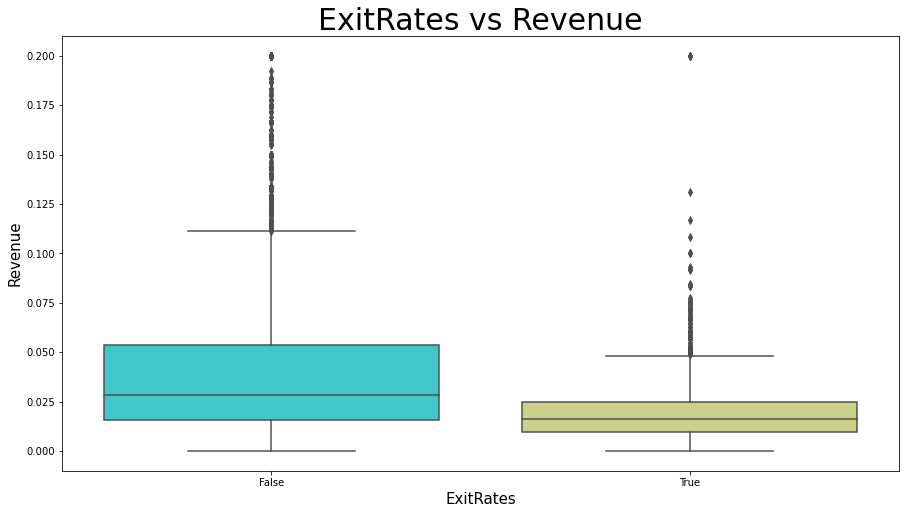

In [49]:
#exit rate vs revenue
sns.boxplot(df['Revenue'], df['ExitRates'], palette = 'rainbow')
plt.title('ExitRates vs Revenue', fontsize = 30)
plt.xlabel('ExitRates', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()

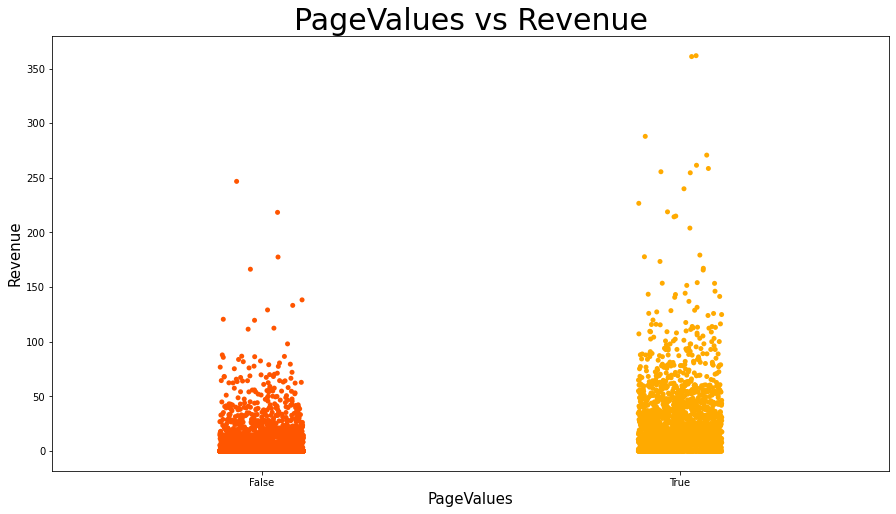

In [50]:
#PageValues vs revenue
sns.stripplot(df['Revenue'], df['PageValues'], palette = 'autumn')
plt.title('PageValues vs Revenue', fontsize = 30)
plt.xlabel('PageValues', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()

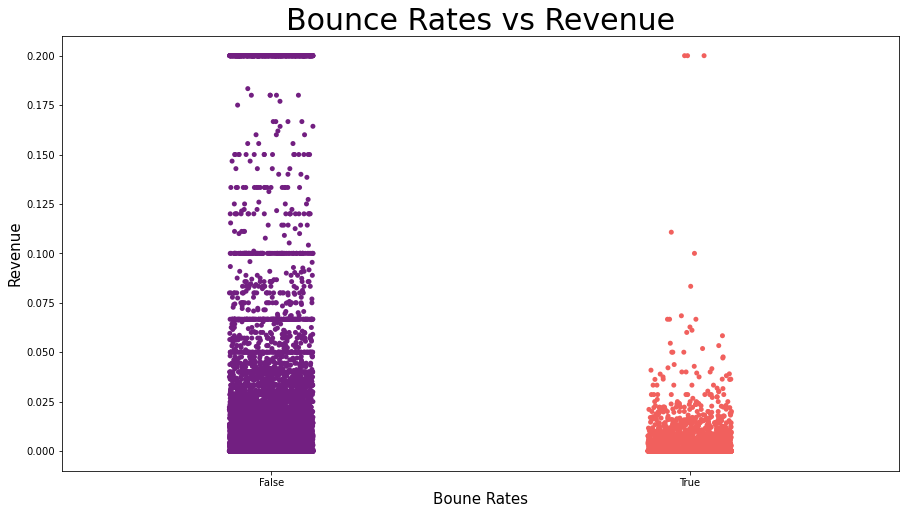

In [51]:
# Cat Vs Num
# bounce rates vs revenue
sns.stripplot(df['Revenue'], df['BounceRates'], palette = 'magma')
plt.title('Bounce Rates vs Revenue', fontsize = 30)
plt.xlabel('Boune Rates', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()

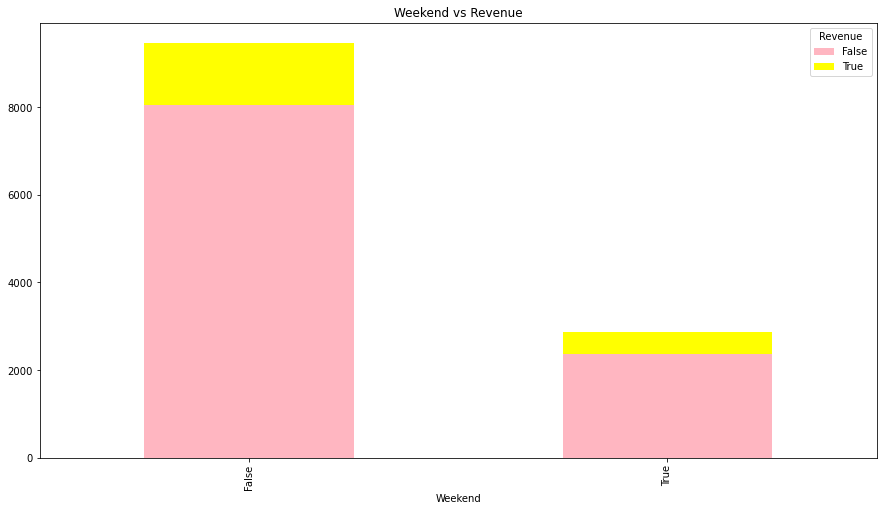

In [52]:
# Cat Vs Cat

# weekend vs Revenue
data = pd.crosstab(df['Weekend'], df['Revenue'])
data.plot(kind = 'bar', stacked = True, color  = ['lightpink', 'yellow'])
plt.title('Weekend vs Revenue')
plt.show()

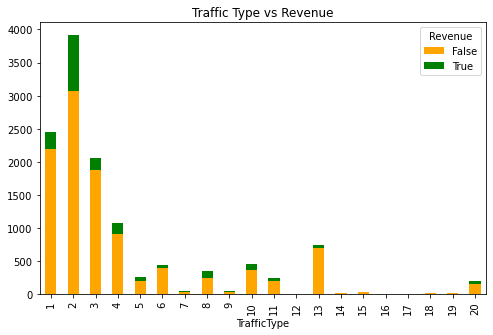

In [53]:
data = pd.crosstab(df['TrafficType'], df['Revenue'])
data.plot(kind = 'bar', stacked = True, figsize = (8, 5), color = ['orange', 'green'])
plt.title('Traffic Type vs Revenue')
plt.show()

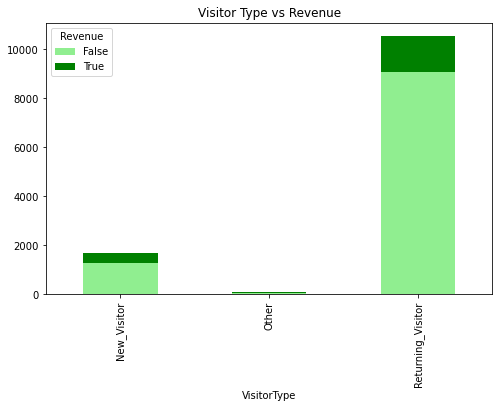

In [54]:
# Cat vs Cat
# visitor type vs revenue
data = pd.crosstab(df['VisitorType'], df['Revenue'])
data.plot(kind = 'bar', stacked = True, figsize = (8, 5), color = ['lightgreen', 'green'])
plt.title('Visitor Type vs Revenue')
plt.show()


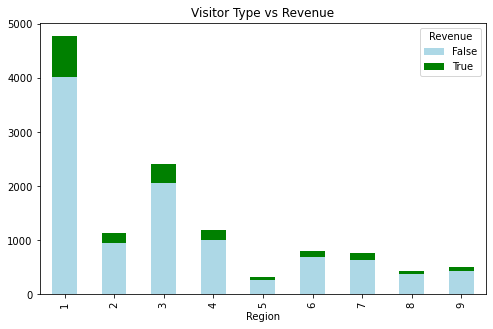

In [55]:
# Cat vs Cat
# Region vs revenue
data = pd.crosstab(df['Region'], df['Revenue'])
data.plot(kind = 'bar', stacked = True, figsize = (8, 5), color = ['lightblue', 'green'])
plt.title('Visitor Type vs Revenue')
plt.show()

In [56]:
df['OperatingSystems']=df['OperatingSystems'].astype(object)
df['Browser']=df['Browser'].astype(object)
df['Region']=df['Region'].astype(object)
df['TrafficType']=df['TrafficType'].astype(object)
df['SpecialDay']=df['SpecialDay'].astype(object)
df['Administrative']=df['Administrative'].astype(object)
df['Informational']=df['Informational'].astype(object)
df['ProductRelated']=df['ProductRelated'].astype(object)

multivariate_Analysis

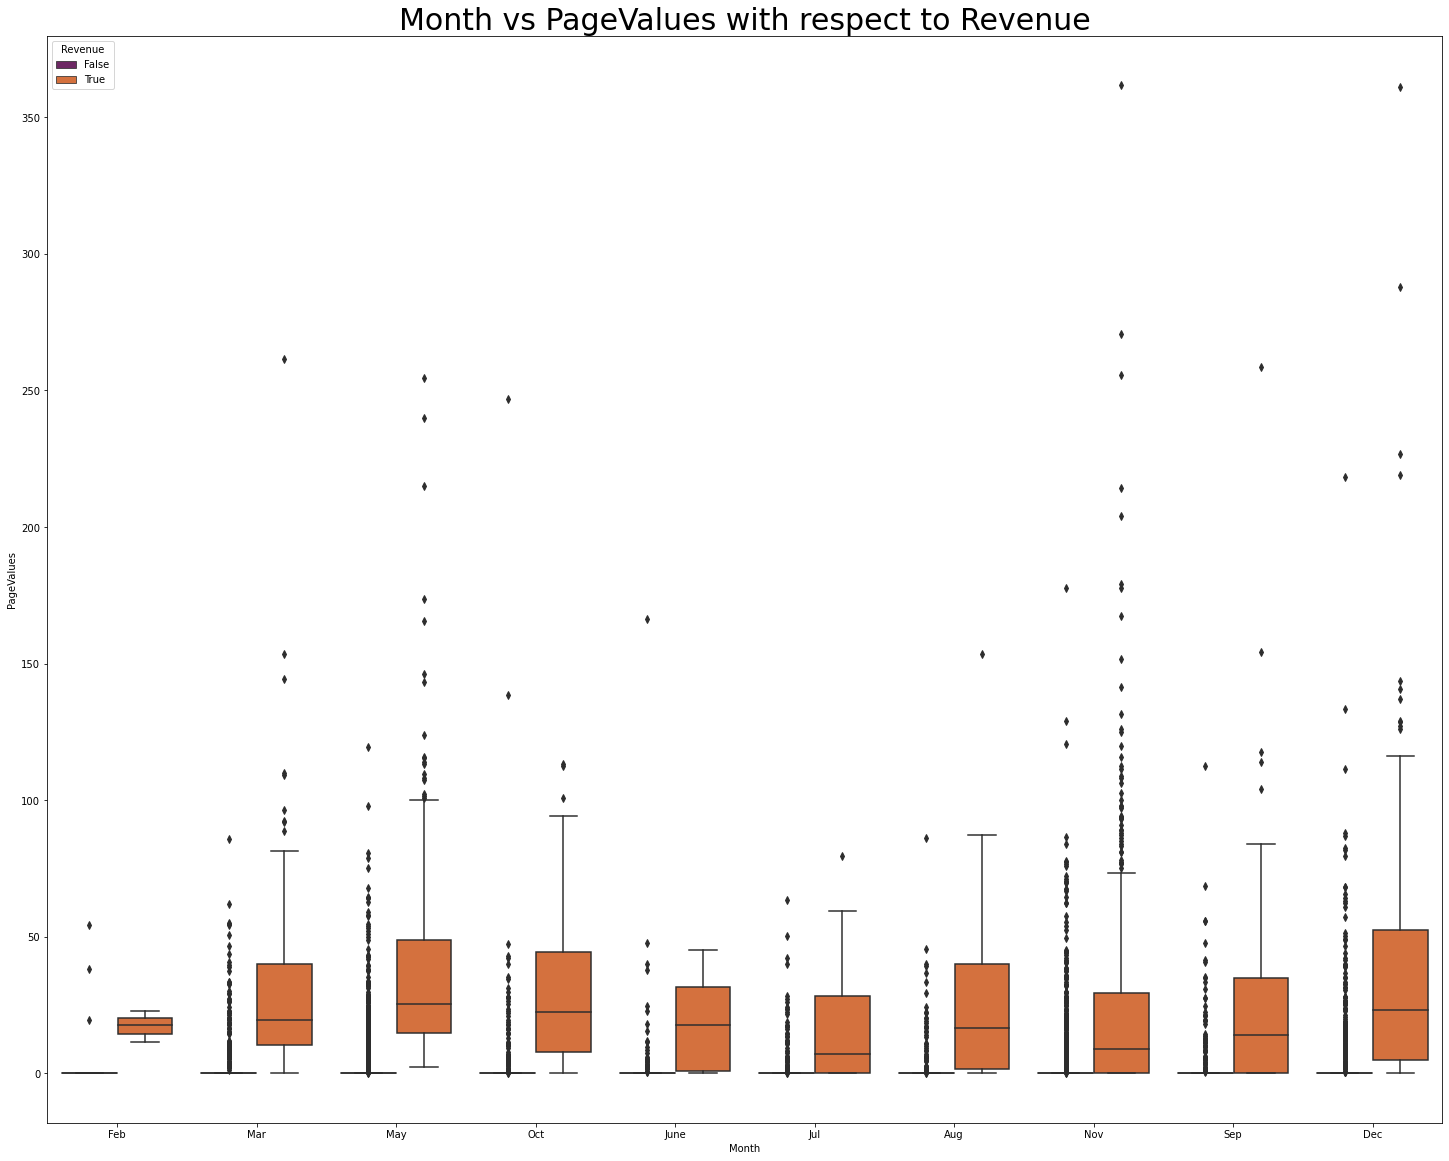

In [57]:
# month vs pagevalues with respect to revenue
plt.figure(figsize = (25,20))
sns.boxplot(x = df['Month'], y = df['PageValues'], hue = df['Revenue'], palette = 'inferno')
plt.title('Month vs PageValues with respect to Revenue', fontsize = 30)
plt.show()

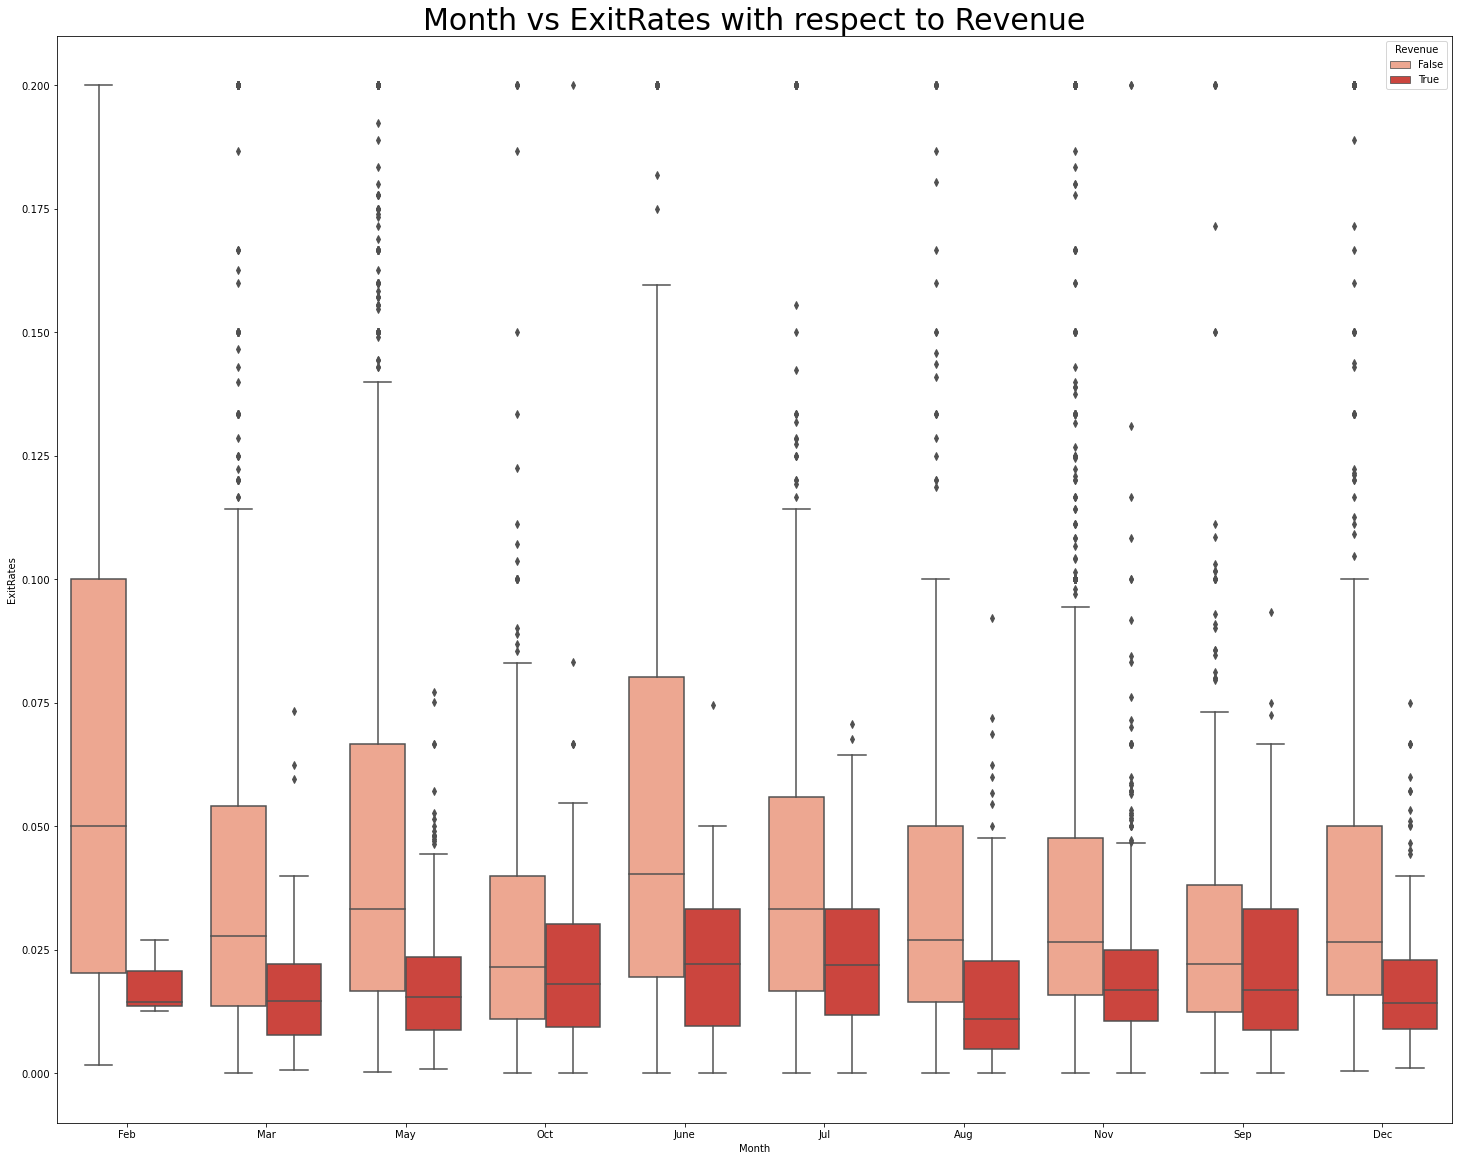

In [58]:
# month vs exitrates with respect to revenue
plt.figure(figsize = (25,20))
#plt.subplot(2, 2, 2)
sns.boxplot(x = df['Month'], y = df['ExitRates'], hue = df['Revenue'], palette = 'Reds')
plt.title('Month vs ExitRates with respect to Revenue', fontsize = 30)
plt.show()


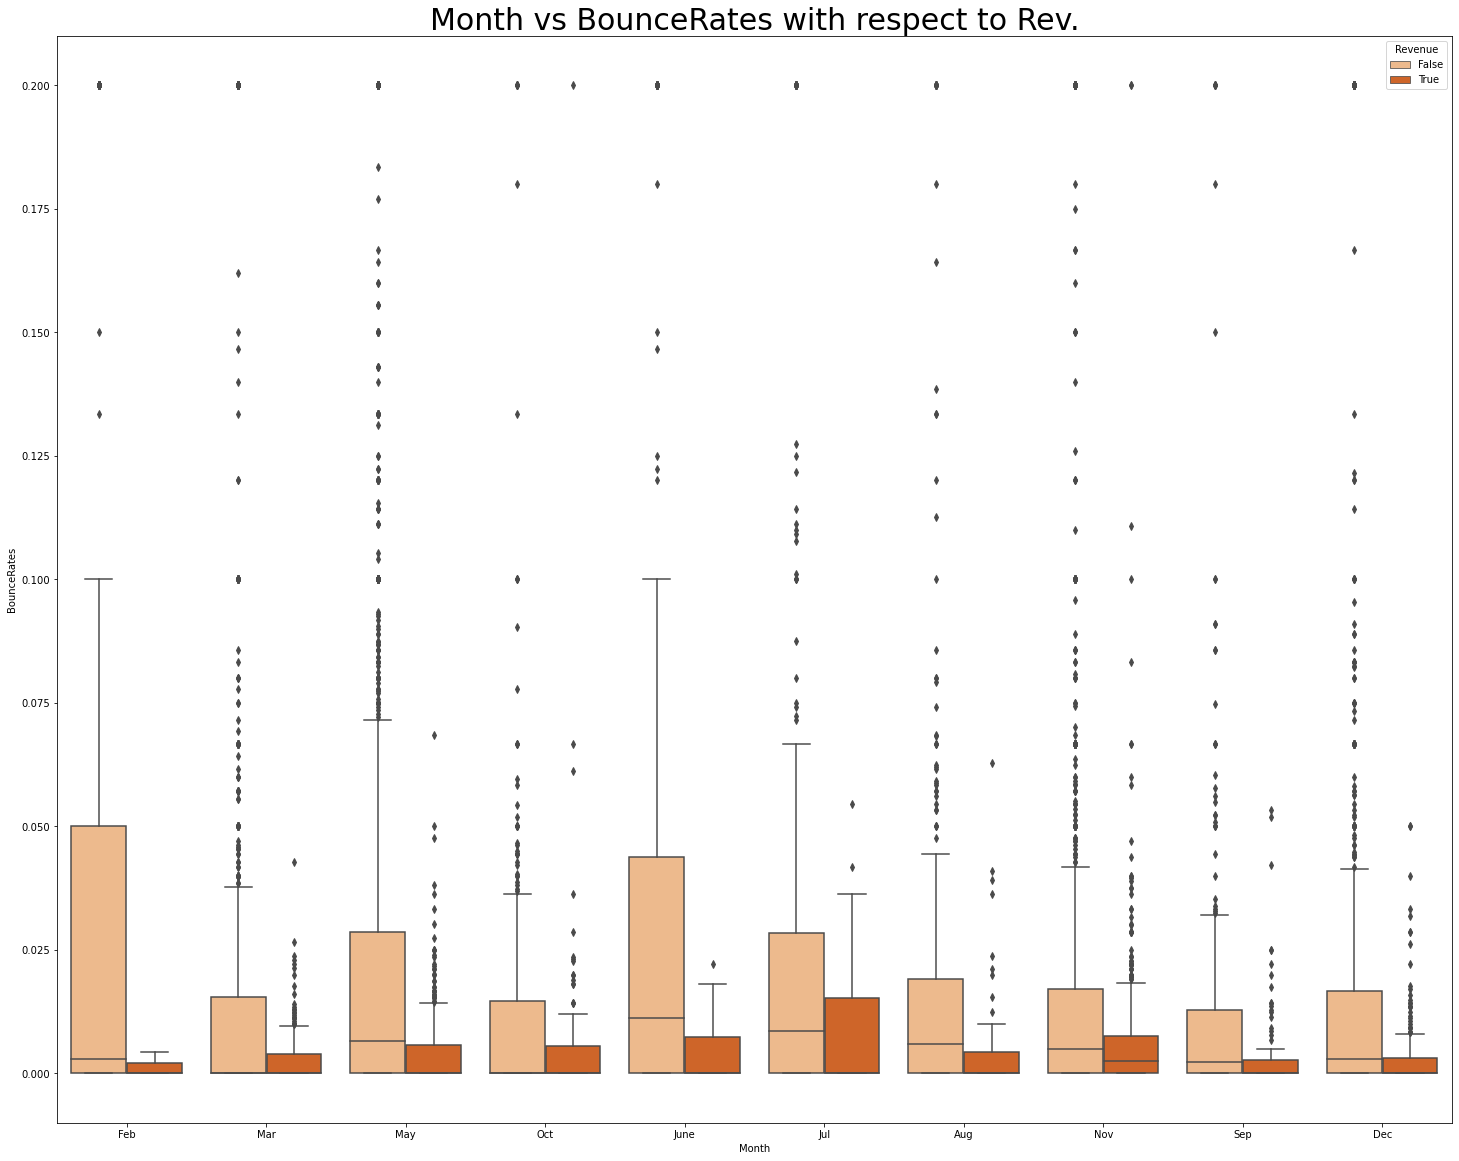

In [59]:
# month vs bouncerates with respect to revenue
plt.figure(figsize = (25,20))
sns.boxplot(x = df['Month'], y = df['BounceRates'], hue = df['Revenue'], palette = 'Oranges')
plt.title('Month vs BounceRates with respect to Rev.', fontsize = 30)
plt.show()

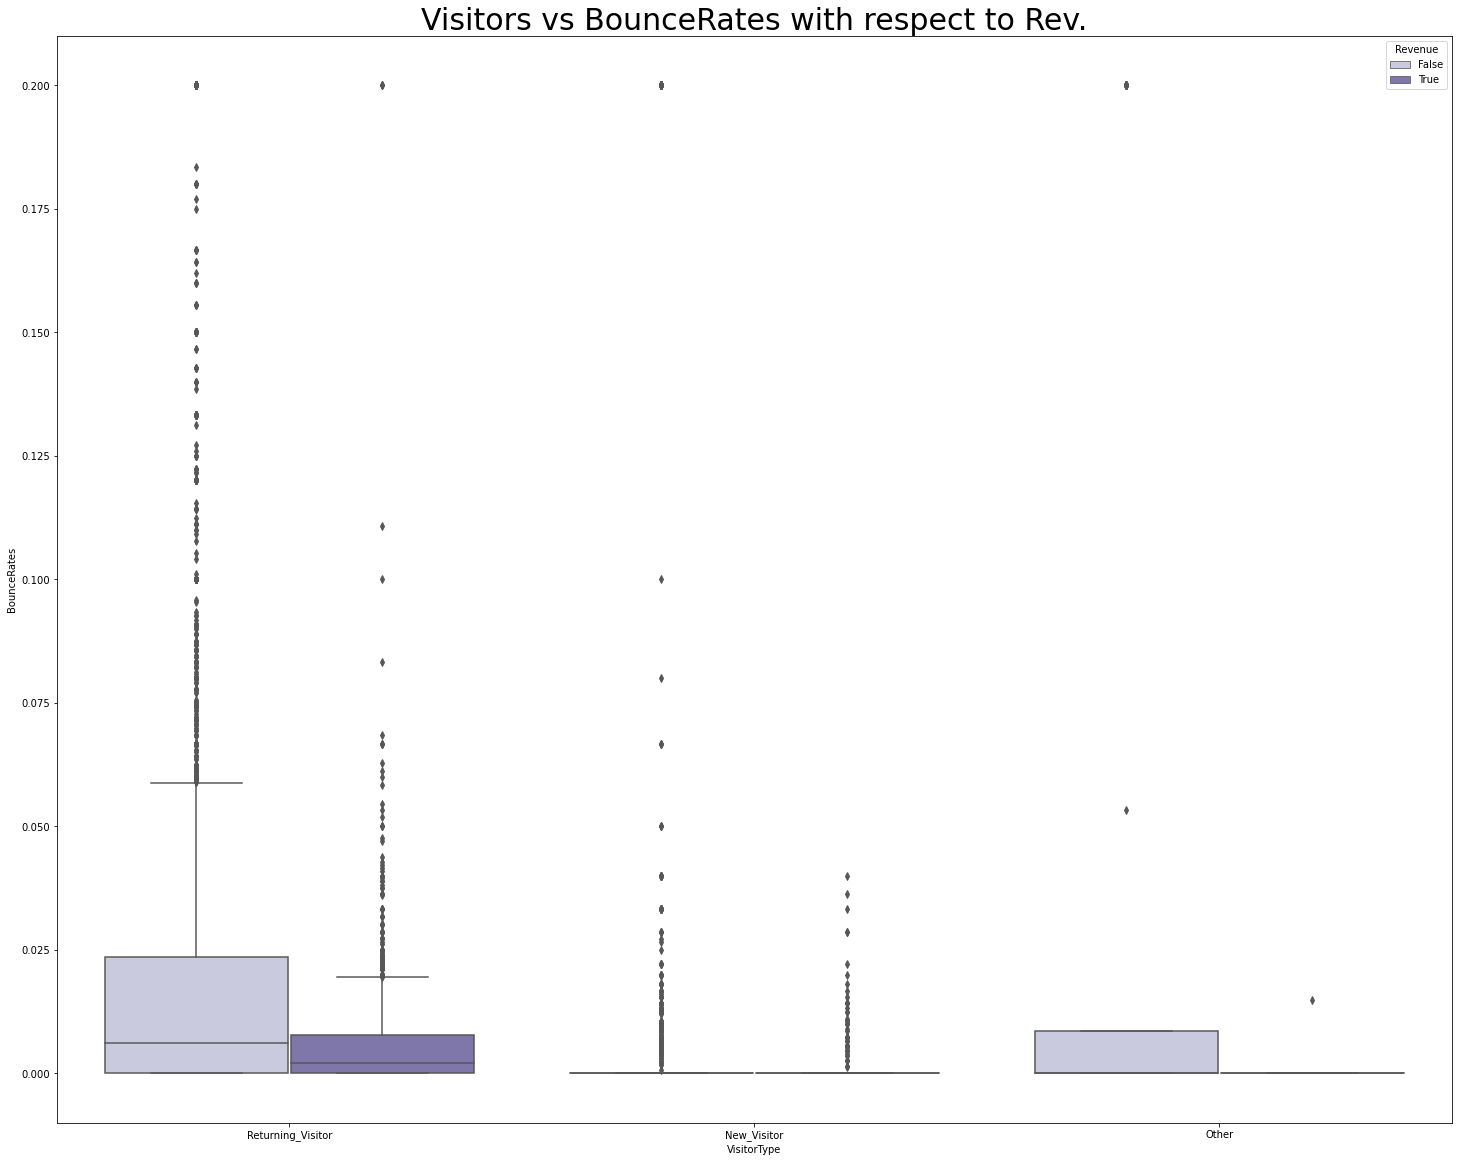

In [60]:
# VisitorType vs Bouncerates with respect to revenue
plt.figure(figsize = (25,20))
sns.boxplot(x = df['VisitorType'], y = df['BounceRates'], hue = df['Revenue'], palette = 'Purples')
plt.title('Visitors vs BounceRates with respect to Rev.', fontsize = 30)
plt.show()


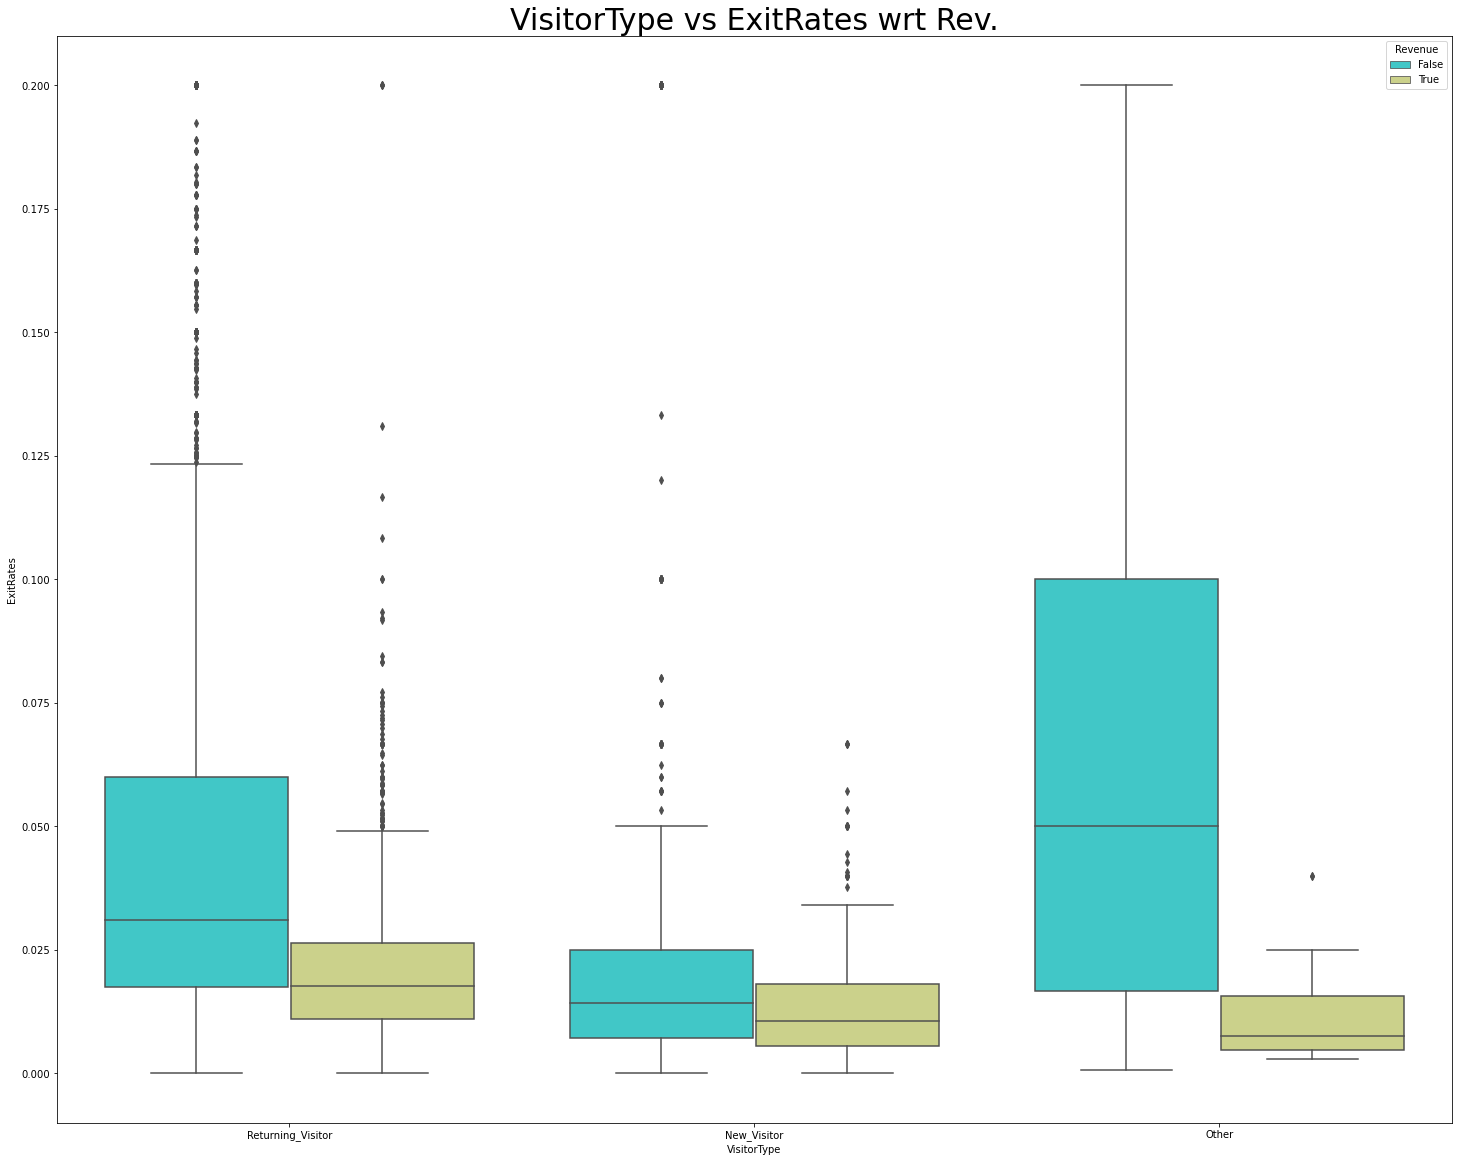

In [61]:
# visitor type vs exit rates w.r.t revenue
plt.figure(figsize = (25,20))
sns.boxplot(x = df['VisitorType'], y = df['ExitRates'], hue = df['Revenue'], palette = 'rainbow')
plt.title('VisitorType vs ExitRates wrt Rev.', fontsize = 30)
plt.show()


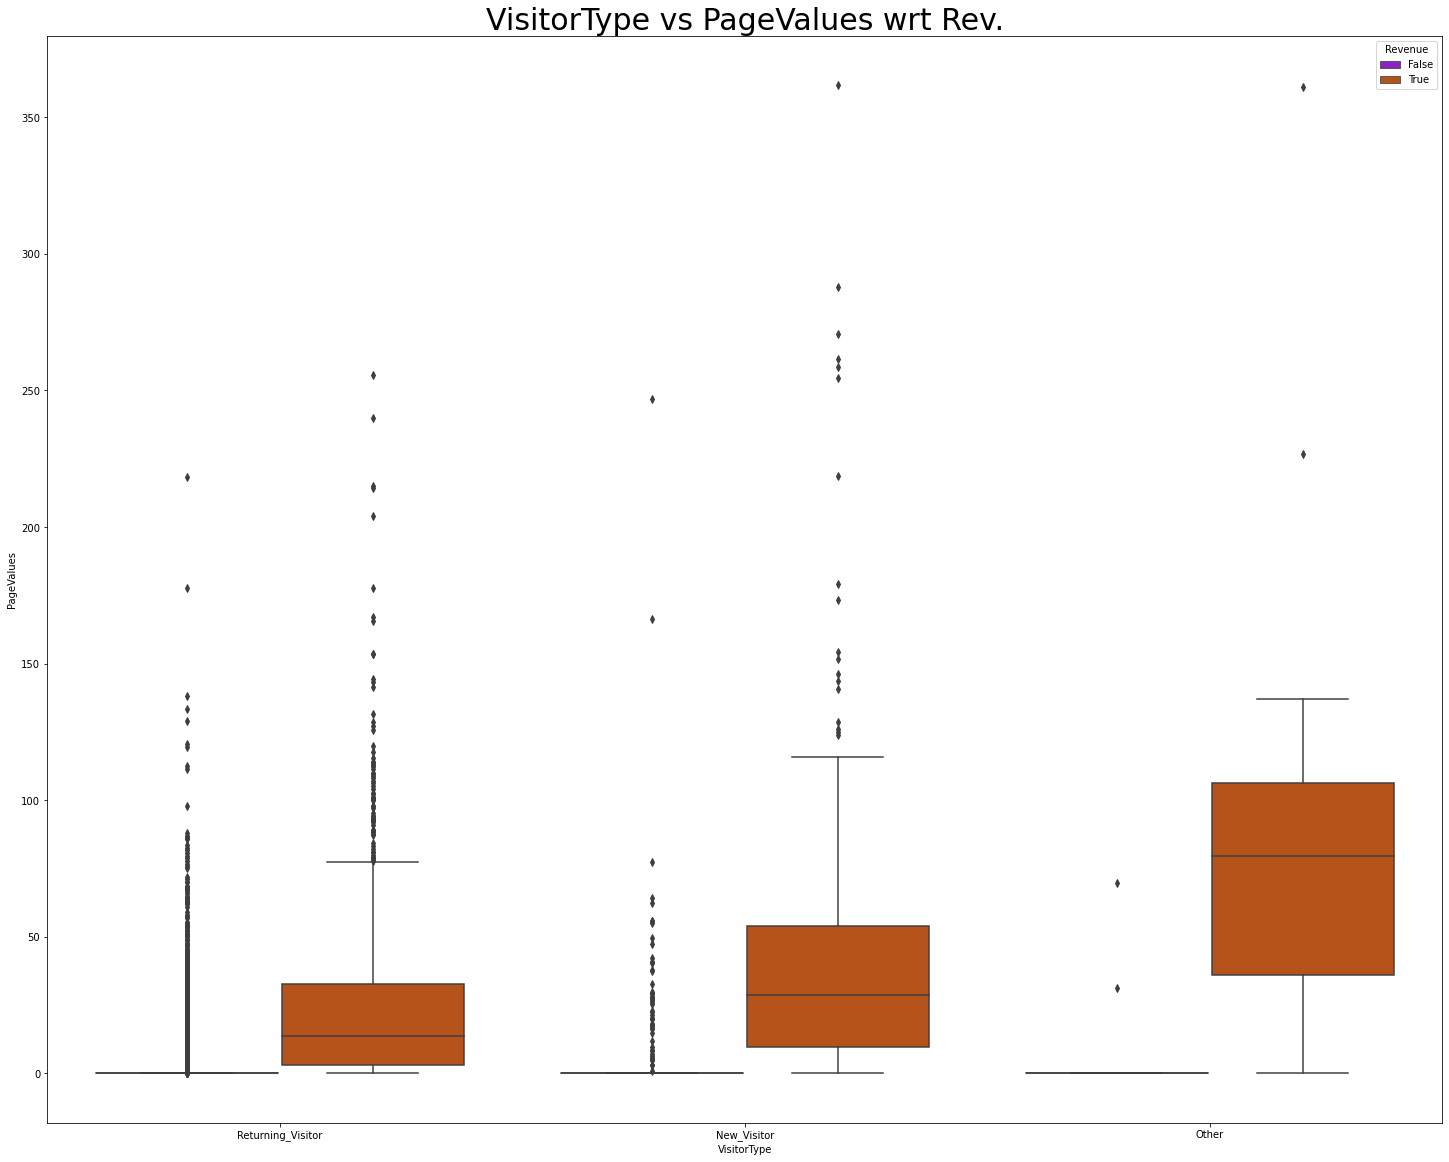

In [62]:
# visitor type vs exit rates w.r.t revenue
plt.figure(figsize = (25,20))
sns.boxplot(x = df['VisitorType'], y = df['PageValues'], hue = df['Revenue'], palette = 'gnuplot')
plt.title('VisitorType vs PageValues wrt Rev.', fontsize = 30)
plt.show()


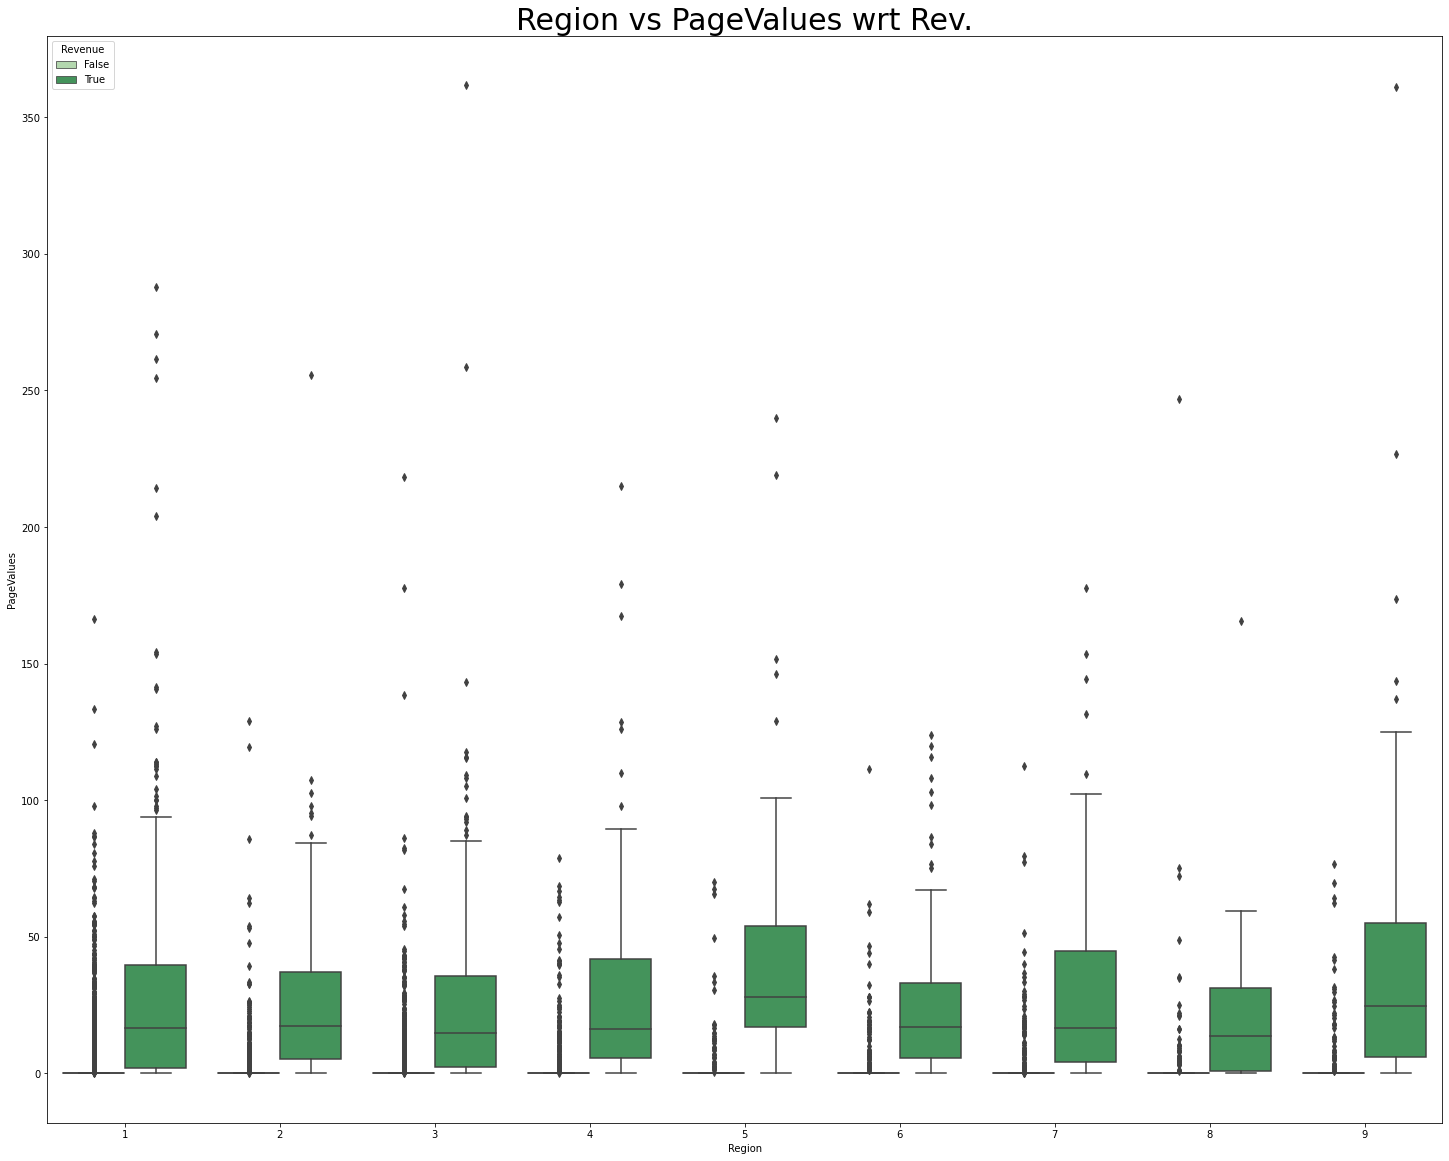

In [63]:
# region vs pagevalues w.r.t. revenue
plt.figure(figsize = (25,20))
sns.boxplot(x = df['Region'], y = df['PageValues'], hue = df['Revenue'], palette = 'Greens')
plt.title('Region vs PageValues wrt Rev.', fontsize = 30)
plt.show()


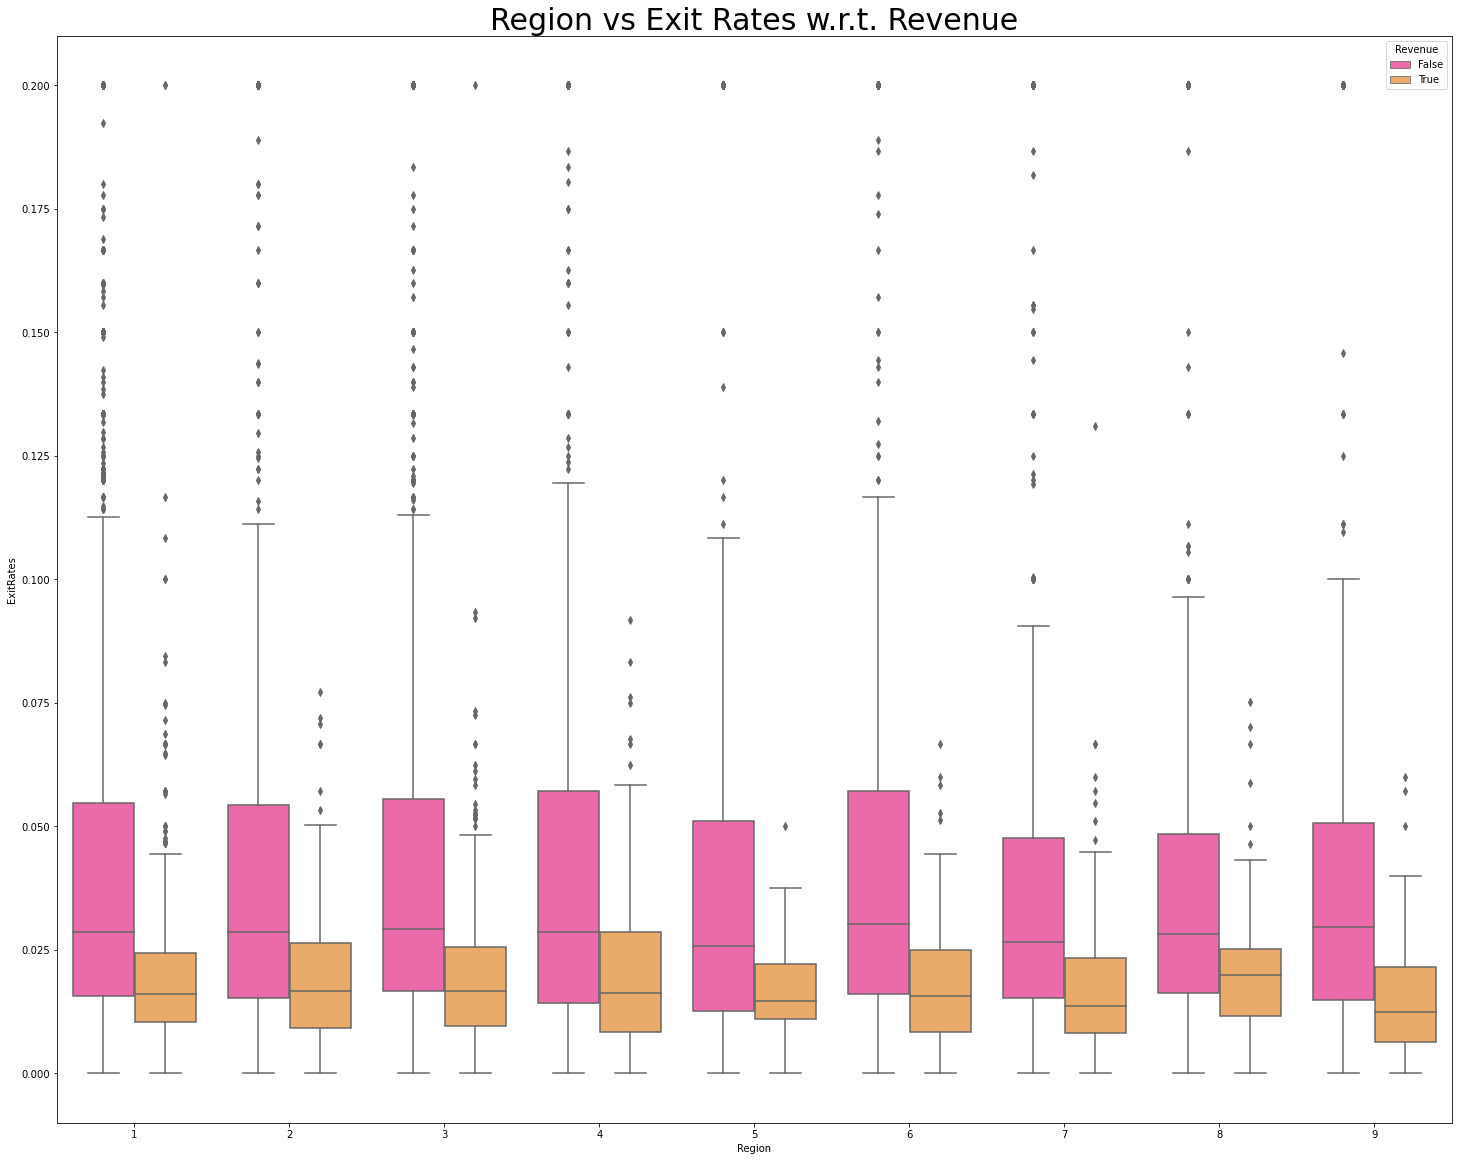

In [64]:
#region vs exit rates w.r.t. revenue
plt.figure(figsize = (25,20))
sns.boxplot(x = df['Region'], y = df['ExitRates'], hue = df['Revenue'], palette = 'spring')
plt.title('Region vs Exit Rates w.r.t. Revenue', fontsize = 30)
plt.show()

	Perform Outlier treatment if required


In [65]:
cat_cols = df.select_dtypes(include=[np.object]).columns
cat_cols

Index(['Administrative', 'Informational', 'ProductRelated', 'SpecialDay',
       'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType',
       'VisitorType'],
      dtype='object')

In [68]:
num_col = df.select_dtypes(include=[np.number]).columns
num_col

Index(['Administrative_Duration', 'Informational_Duration',
       'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues'],
      dtype='object')

skewness of column Administrative_Duration   5.61571901877419


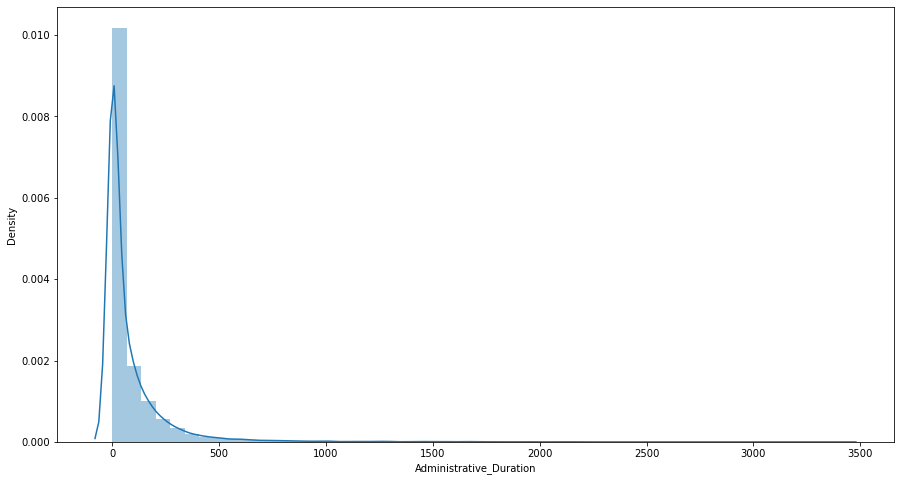

skewness of column Informational_Duration   7.579184715734214


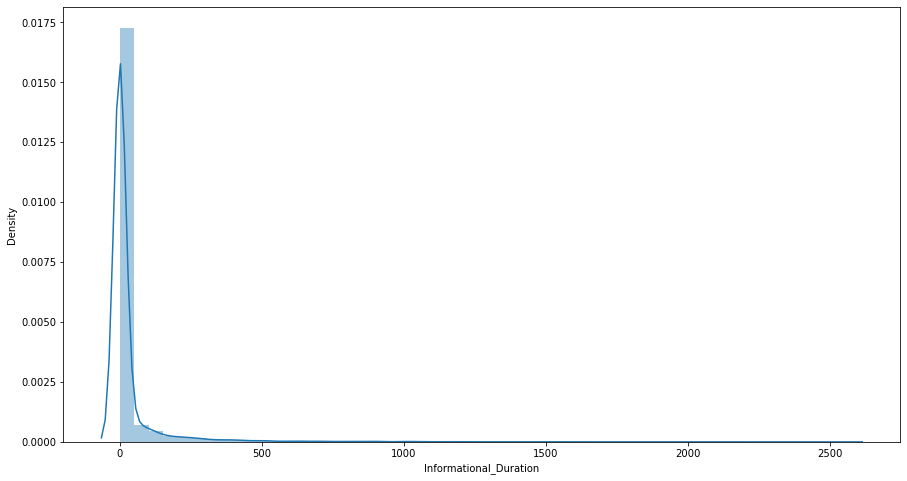

skewness of column ProductRelated_Duration   7.263227682561318


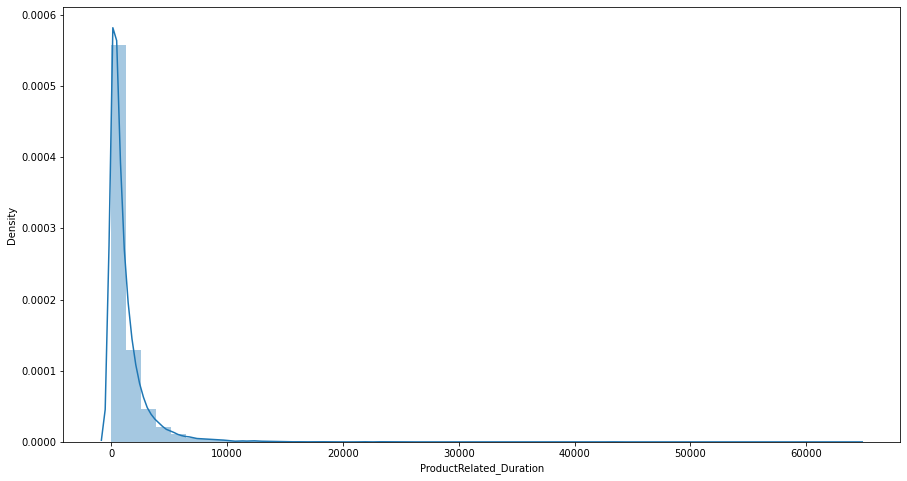

skewness of column BounceRates   2.947855266695535


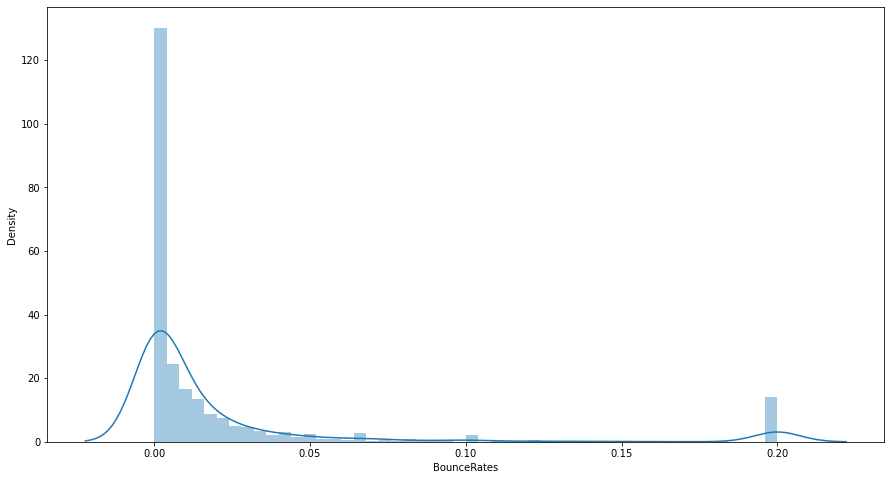

skewness of column ExitRates   2.1487889999009804


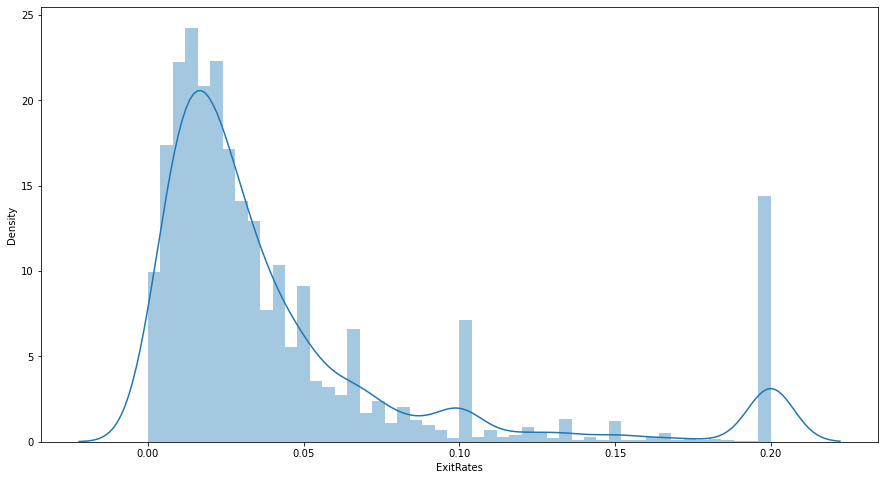

skewness of column PageValues   6.382964248998133


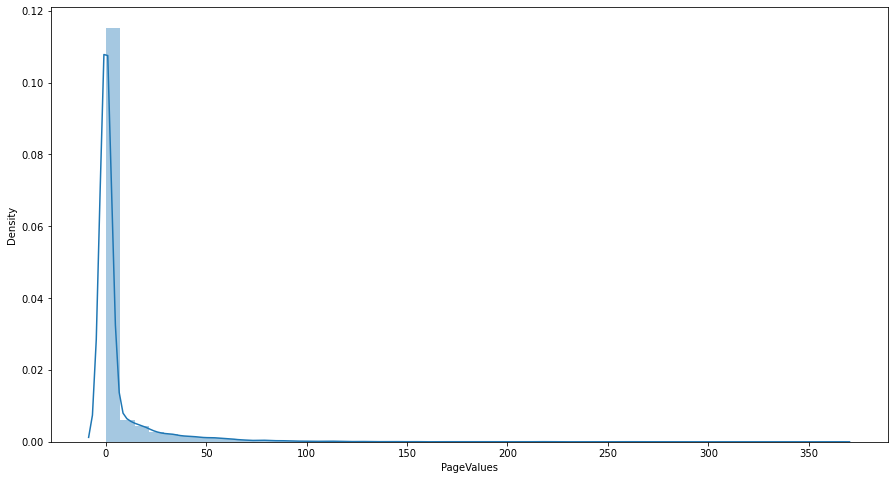

In [72]:
for i in num_col:
    print('skewness of column {}'.format(i),' ', df[i].skew())
    sns.distplot(df[i])
    plt.show()

In [74]:
for i in num_col:
    print('skewness of column {}'.format(i),' ',np.sqrt(df[i]).skew())

skewness of column Administrative_Duration   1.5400627668813376
skewness of column Informational_Duration   3.4399952471932993
skewness of column ProductRelated_Duration   1.3938911834185597
skewness of column BounceRates   1.6814732748706516
skewness of column ExitRates   1.2080904104316599
skewness of column PageValues   2.5338336229289506


In [75]:

df['Administrative_Duration'] = np.sqrt(df['Administrative_Duration'])
df['Informational_Duration'] = np.sqrt(df['Informational_Duration'])
df['ProductRelated_Duration'] = np.sqrt(df['ProductRelated_Duration'])
df['BounceRates'] = np.sqrt(df['BounceRates'])
df['ExitRates'] = np.sqrt(df['ExitRates'])
df['PageValues'] = np.sqrt(df['PageValues'])

In [76]:
df.skew()

Administrative             1.960357
Administrative_Duration    1.540063
Informational              4.036464
Informational_Duration     3.439995
ProductRelated             4.341516
ProductRelated_Duration    1.393891
BounceRates                1.681473
ExitRates                  1.208090
PageValues                 2.533834
SpecialDay                 3.302667
OperatingSystems           2.066285
Browser                    3.242350
Region                     0.983549
TrafficType                1.962987
Weekend                    1.265962
Revenue                    1.909509
dtype: float64

In [77]:
numerical_features=['BounceRates','ExitRates','Administrative_Duration','ProductRelated_Duration','Informational_Duration','PageValues']
for cols in numerical_features:
    Q1 = df[cols].quantile(0.25)
    Q3 = df[cols].quantile(0.75)
    IQR = Q3 - Q1     

    df_1 = (df[cols] >= Q1 - 1.5 * IQR) & (df[cols] <= Q3 + 1.5 *IQR)
    df = df.loc[df_1]

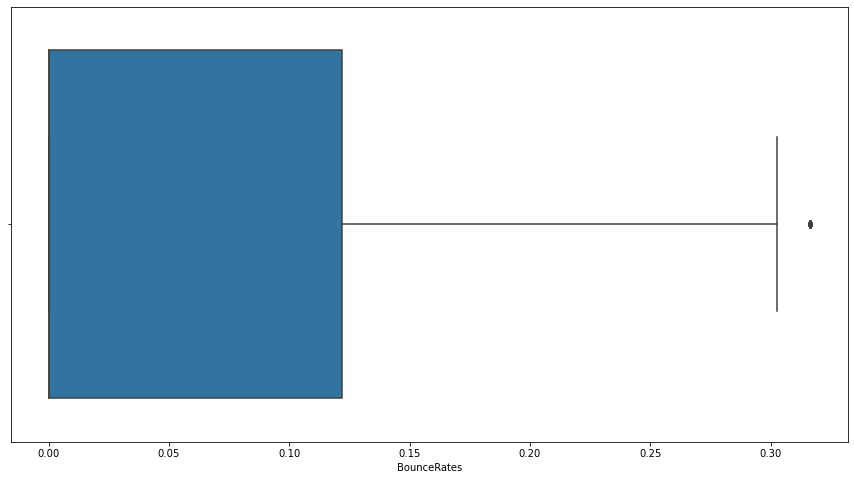

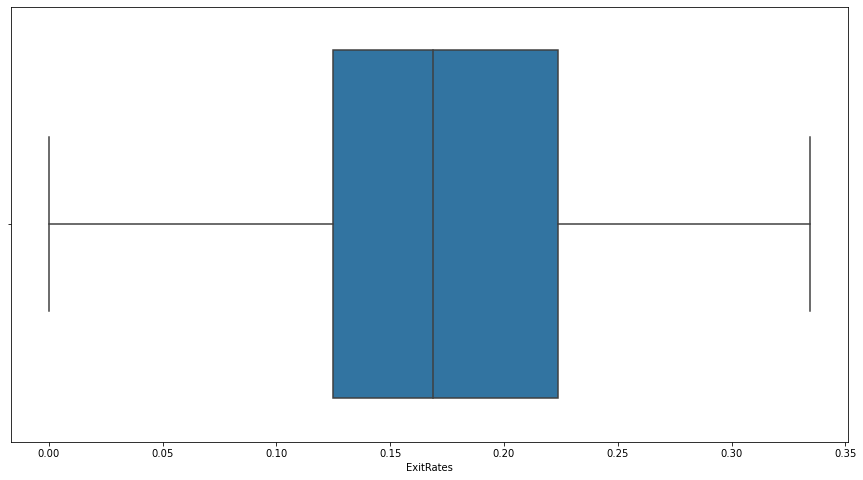

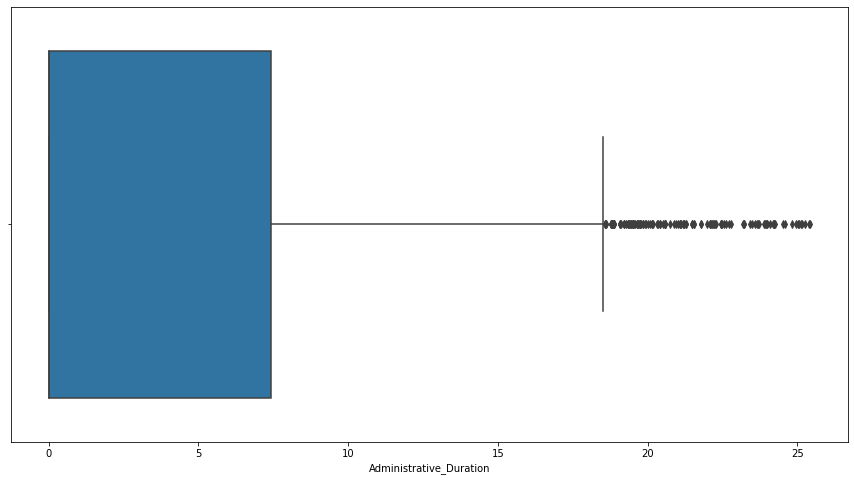

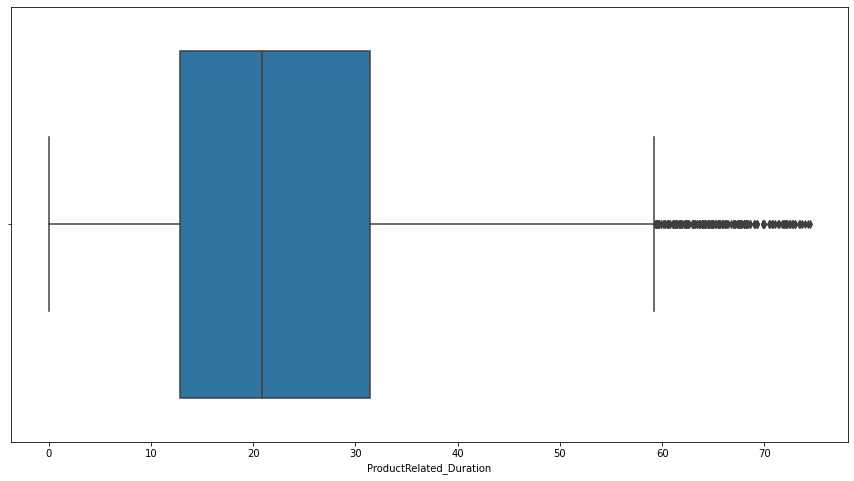

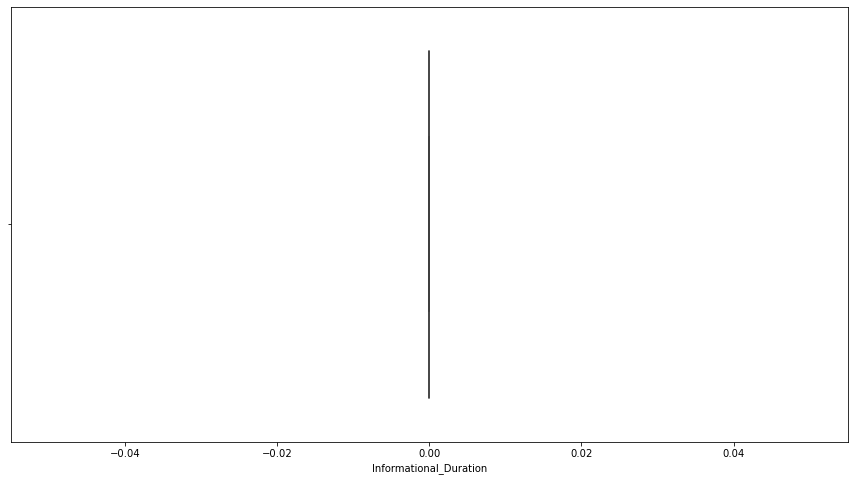

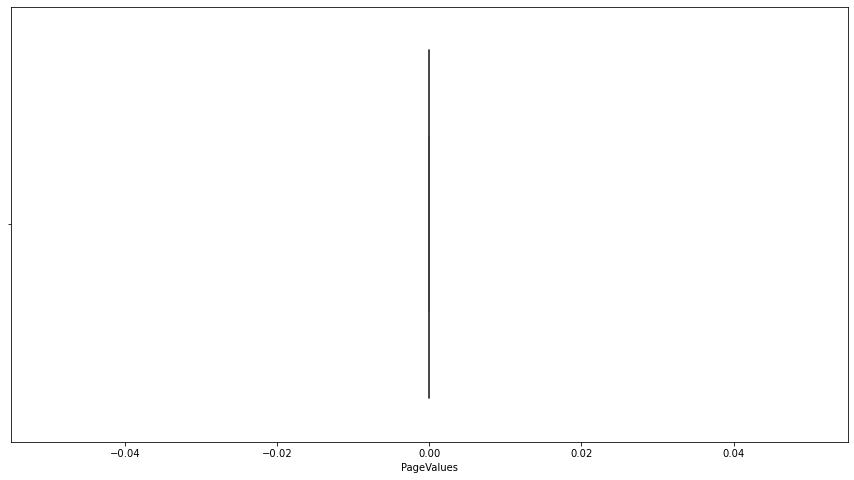

In [78]:
for i in numerical_features:
    sns.boxplot(df[i])
    plt.show()

In [79]:
# #All the outliers are removed

	Perform appropriate scaling


In [81]:
df.dtypes

Administrative              object
Administrative_Duration    float64
Informational               object
Informational_Duration     float64
ProductRelated              object
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                  object
Month                       object
OperatingSystems            object
Browser                     object
Region                      object
TrafficType                 object
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [80]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [82]:
Cat_col = ['Weekend','Revenue','Administrative','Informational','ProductRelated','SpecialDay',
 'OperatingSystems','Browser','Region','Month','TrafficType','VisitorType']


feature_scale = [feature for feature in df.columns if feature not in Cat_col]


scaler = StandardScaler()
scaler.fit(df[feature_scale])

StandardScaler()

In [83]:
scaled_data = pd.concat([df[['Weekend','Revenue','Administrative','Informational',
                                    'ProductRelated','SpecialDay','OperatingSystems',
                                    'Browser','Region','Month','TrafficType','VisitorType']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(df[feature_scale]), columns=feature_scale)],
                    axis=1)
scaled_data.head()

,Weekend,Revenue,Administrative,Informational,ProductRelated,SpecialDay,OperatingSystems,Browser,Region,Month,TrafficType,VisitorType,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues
0,False,False,0,0,2,0.0,2,2,1,Feb,2,Returning_Visitor,-0.7209,0.0,-1.100992,-0.796536,2.030526,0.0
1,True,False,0,0,10,0.0,3,3,1,Feb,4,Returning_Visitor,-0.7209,0.0,0.100948,0.983843,0.694081,0.0
2,False,False,0,0,19,0.0,2,2,1,Feb,3,Returning_Visitor,-0.7209,0.0,-0.789516,0.785372,-0.271030,0.0
3,False,False,0,0,2,0.8,2,2,2,Feb,3,Returning_Visitor,-0.7209,0.0,-1.236148,-0.796536,2.030526,0.0
4,False,False,0,0,3,0.4,2,4,1,Feb,2,Returning_Visitor,-0.7209,0.0,0.250131,-0.796536,-0.381407,0.0


	Perform required encoding techniques


In [84]:
from sklearn.preprocessing import LabelEncoder

In [85]:
features = ['Month','VisitorType','Weekend','Revenue']
label_encoder = LabelEncoder()
for col in features:
    df[col] = label_encoder.fit_transform(scaled_data[col])
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
1,0,0.0,0,0.0,2,8.000000,0.000000,0.316228,0.0,0.0,2,2,2,1,2,2,0,0
4,0,0.0,0,0.0,10,25.049950,0.141421,0.223607,0.0,0.0,2,3,3,1,4,2,1,0
5,0,0.0,0,0.0,19,12.418400,0.125656,0.156721,0.0,0.0,2,2,2,1,3,2,0,0
8,0,0.0,0,0.0,2,6.082763,0.000000,0.316228,0.0,0.8,2,2,2,2,3,2,0,0
9,0,0.0,0,0.0,3,27.166155,0.000000,0.149071,0.0,0.4,2,2,4,1,2,2,0,0


	Build the different cluster models.


In [86]:
#Spliting the dependent and independent variables.
from sklearn.model_selection import train_test_split

In [87]:
X= df.drop(['Revenue'],axis=1)
y= df.Revenue

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,random_state = 42)

In [88]:
print("Input Training:",X_train.shape)
print("Input Test:",X_test.shape)
print("Output Training:",y_train.shape)
print("Output Test:",y_test.shape)

Input Training: (5629, 17)
Input Test: (1408, 17)
Output Training: (5629,)
Output Test: (1408,)


In [89]:
def get_test_report(model):
    test_pred = model.predict(X_test)
    return(classification_report(y_test, test_pred))

In [90]:
def plot_confusion_matrix(model, test_data):
    
    # predict the target values using X_test
    y_pred = model.predict(test_data)
    cm = confusion_matrix(y_test, y_pred)
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.show()

In [91]:
def plot_roc(model, test_data):
    
    # predict the probability of target variable using X_test
    # consider the probability of positive class by subsetting with '[:,1]'
    y_pred_prob = model.predict_proba(test_data)[:,1]
    
    # the roc_curve() returns the values for false positive rate, true positive rate and threshold
    # pass the actual target values and predicted probabilities to the function
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    # plot the ROC curve
    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')
    
    plt.title('ROC curve for Cancer Prediction Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))

    # plot the grid
    plt.grid(True)

In [92]:
#Applying Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [93]:
rf_classification = RandomForestClassifier(n_estimators = 10, random_state = 42)
rf_model = rf_classification.fit(X_train, y_train)

In [94]:
test_report = get_test_report(rf_model)
print(test_report) 

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1360
           1       0.50      0.04      0.08        48

    accuracy                           0.97      1408
   macro avg       0.73      0.52      0.53      1408
weighted avg       0.95      0.97      0.95      1408



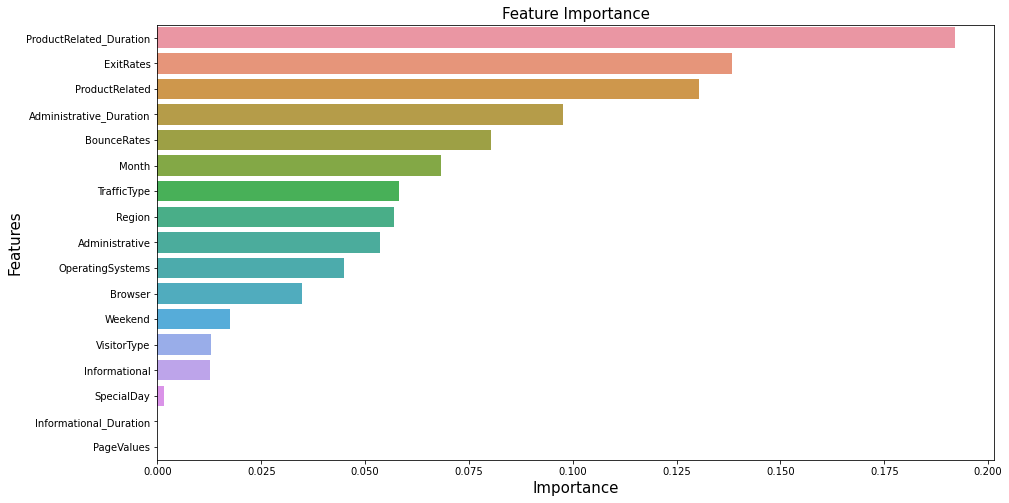

In [95]:
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': rf_model.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()


In [97]:
#Product Related_Duration has highest importance

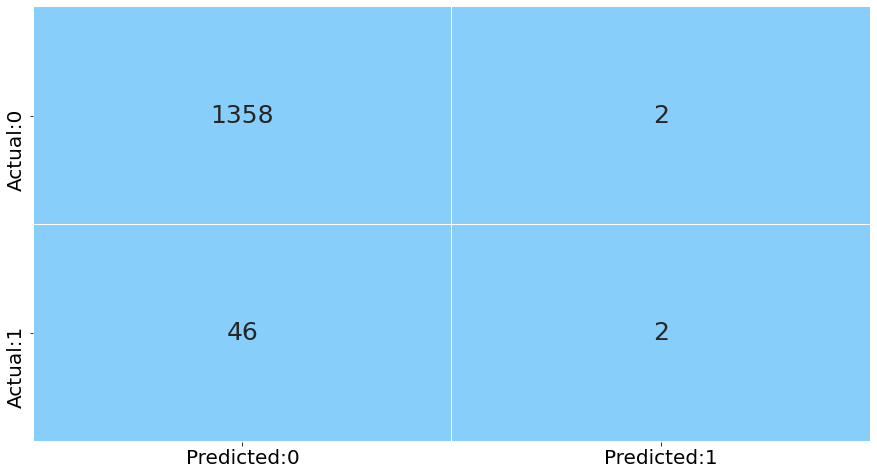

In [98]:
plot_confusion_matrix(rf_model, test_data = X_test)

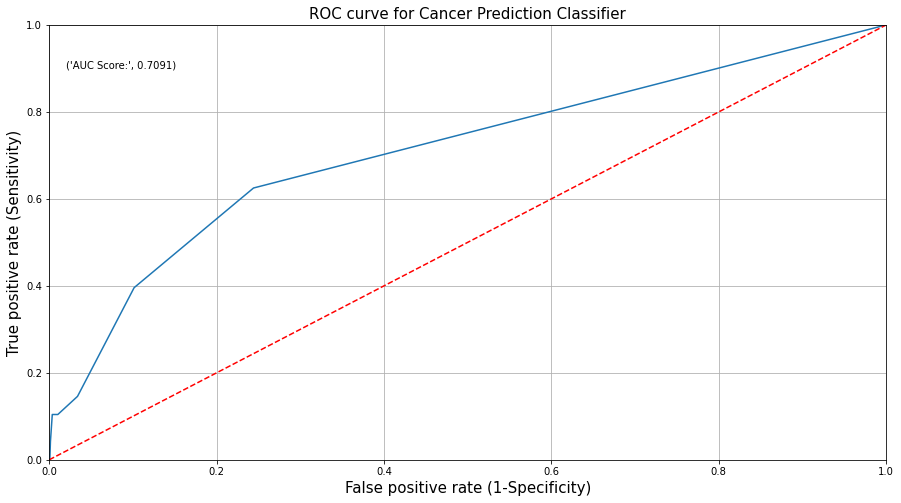

In [99]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
plot_roc(rf_model, test_data = X_test)

	Analyse the optimum number of cluster using appropriate techniques.


In [100]:
X_norm = StandardScaler()
num_norm = X_norm.fit_transform(df)
X = pd.DataFrame(num_norm, columns = df.columns)
X.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,-0.635594,-0.7209,-0.144975,0.0,-0.855685,-1.100992,-0.796536,2.030526,0.0,-0.326429,-1.311417,-0.135432,-0.215551,-0.900291,-0.523116,0.433769,-0.540501,-0.191526
1,-0.635594,-0.7209,-0.144975,0.0,-0.505804,0.100948,0.983843,0.694081,0.0,-0.326429,-1.311417,0.956247,0.364721,-0.900291,-0.026667,0.433769,1.850136,-0.191526
2,-0.635594,-0.7209,-0.144975,0.0,-0.112187,-0.789516,0.785372,-0.271030,0.0,-0.326429,-1.311417,-0.135432,-0.215551,-0.900291,-0.274891,0.433769,-0.540501,-0.191526
3,-0.635594,-0.7209,-0.144975,0.0,-0.855685,-1.236148,-0.796536,2.030526,0.0,3.506830,-1.311417,-0.135432,-0.215551,-0.487269,-0.274891,0.433769,-0.540501,-0.191526
4,-0.635594,-0.7209,-0.144975,0.0,-0.811950,0.250131,-0.796536,-0.381407,0.0,1.590200,-1.311417,-0.135432,0.944992,-0.900291,-0.523116,0.433769,-0.540501,-0.191526


In [112]:
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
import matplotlib.cm as cm

 K-Means Clustering

In [105]:
wcss  = []
for i in range(1,21):
    kmeans = KMeans(n_clusters = i, random_state = 10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

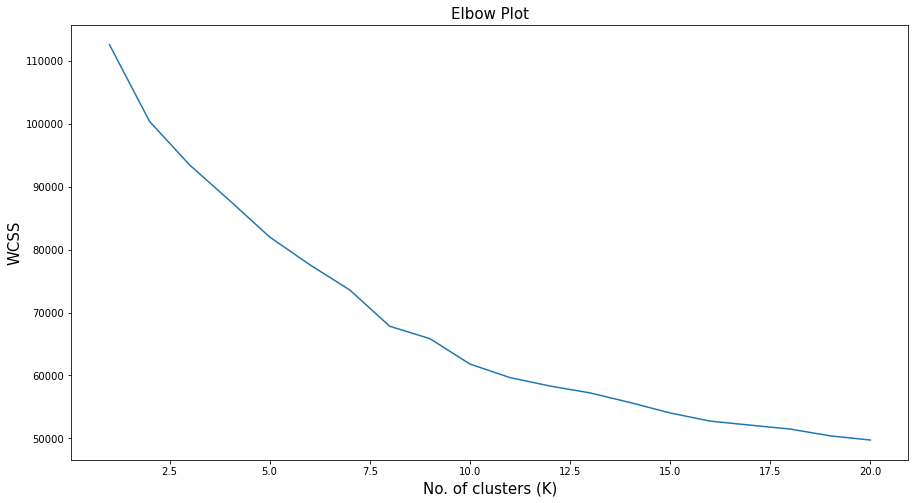

In [106]:
plt.plot(range(1,21), wcss)
plt.title('Elbow Plot', fontsize = 15)
plt.xlabel('No. of clusters (K)', fontsize = 15)
plt.ylabel('WCSS', fontsize = 15)
plt.show()

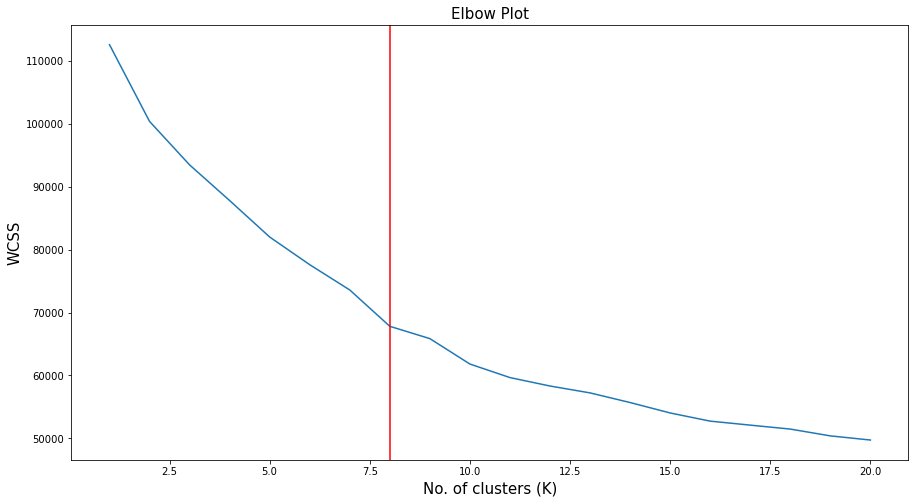

In [108]:
plt.plot(range(1,21), wcss)
plt.title('Elbow Plot', fontsize = 15)
plt.xlabel('No. of clusters (K)', fontsize = 15)
plt.ylabel('WCSS', fontsize = 15)
plt.axvline(x = 8, color = 'red')
plt.show()

Interpretation: We can see that the for K = 8, there is an elbow in the plot. Before this elbow point, the WCSS is decreasing rapidly and after K = 8, the WCSS is decreasing slowly.

Now, let us use the silhouette score method to identify the optimal value of K.

Optimal Value of K Using Silhouette Score

In [109]:
n_clusters = [2, 3, 4, 5, 6,7,8,9,10]
for K in n_clusters:
    cluster = KMeans (n_clusters= K, random_state= 10)
    predict = cluster.fit_predict(X)
    score = silhouette_score(X, predict, random_state= 10)
    print ("For {} clusters the silhouette score is {})".format(K, score))

For 2 clusters the silhouette score is 0.13766465157125984)
For 3 clusters the silhouette score is 0.1482831092997594)
For 4 clusters the silhouette score is 0.14845143034173133)
For 5 clusters the silhouette score is 0.14466069750093843)
For 6 clusters the silhouette score is 0.12039938573901832)
For 7 clusters the silhouette score is 0.1223085203135044)
For 8 clusters the silhouette score is 0.13674980745028248)
For 9 clusters the silhouette score is 0.13620453018652323)
For 10 clusters the silhouette score is 0.14204329793719025)


In [110]:
# cluster 4 is best value for the . 

Visualize the silhouette scores

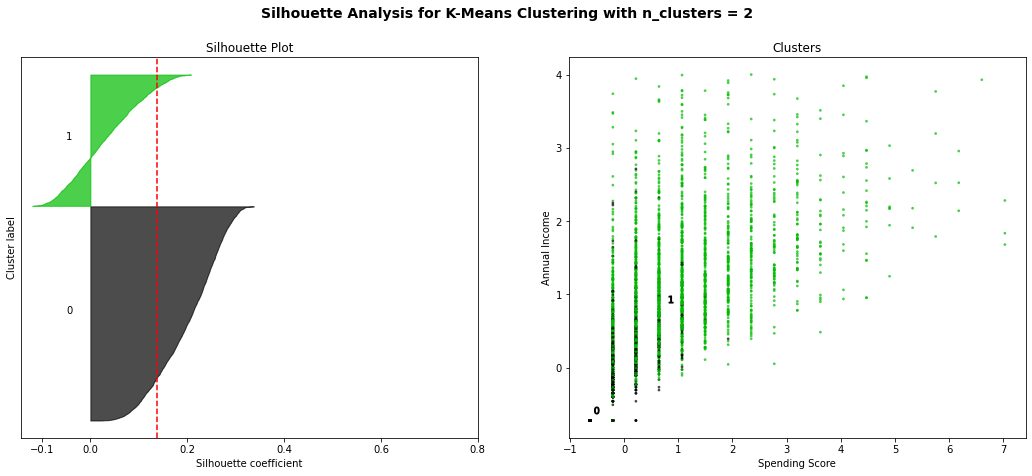

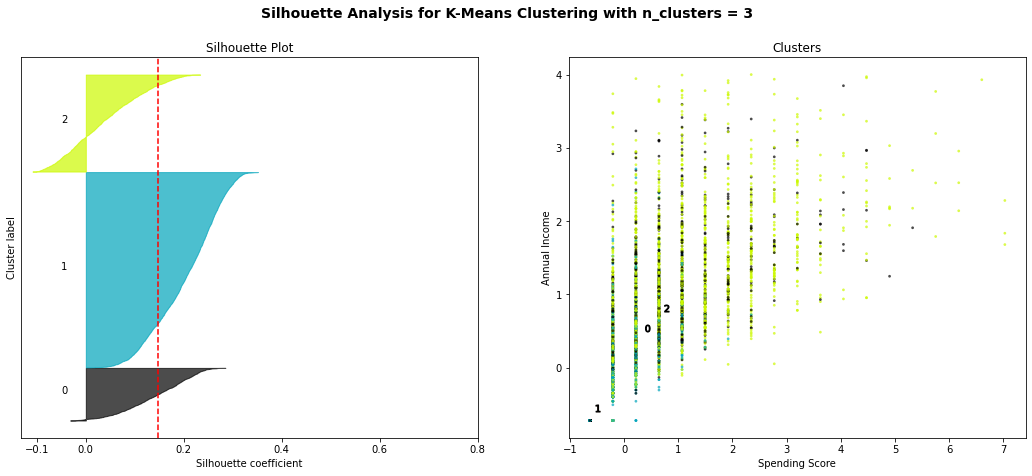

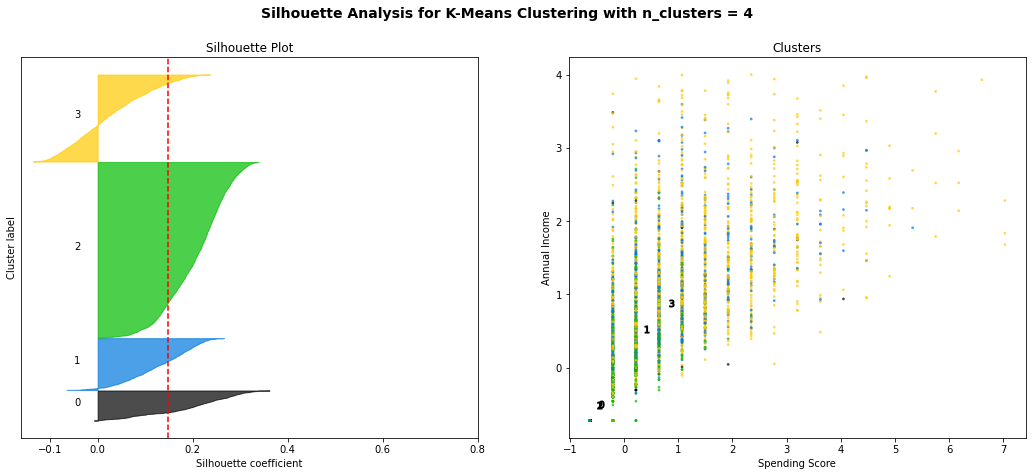

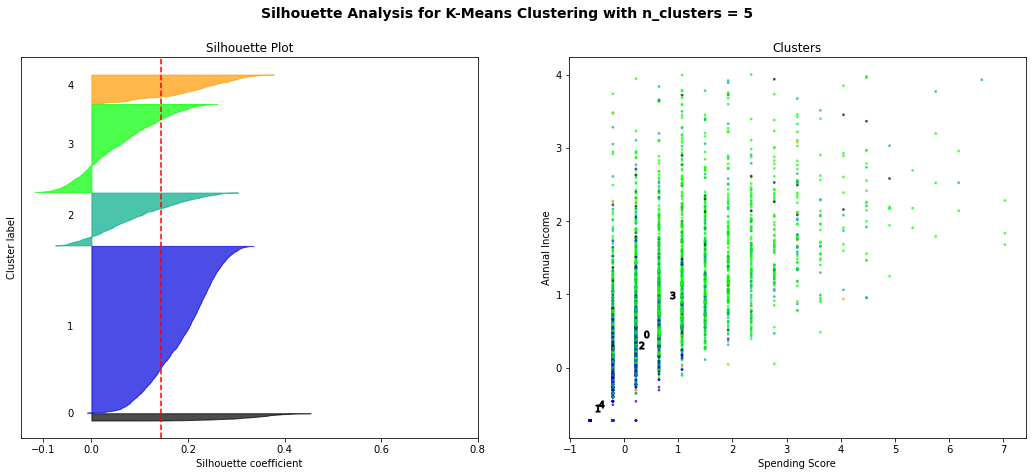

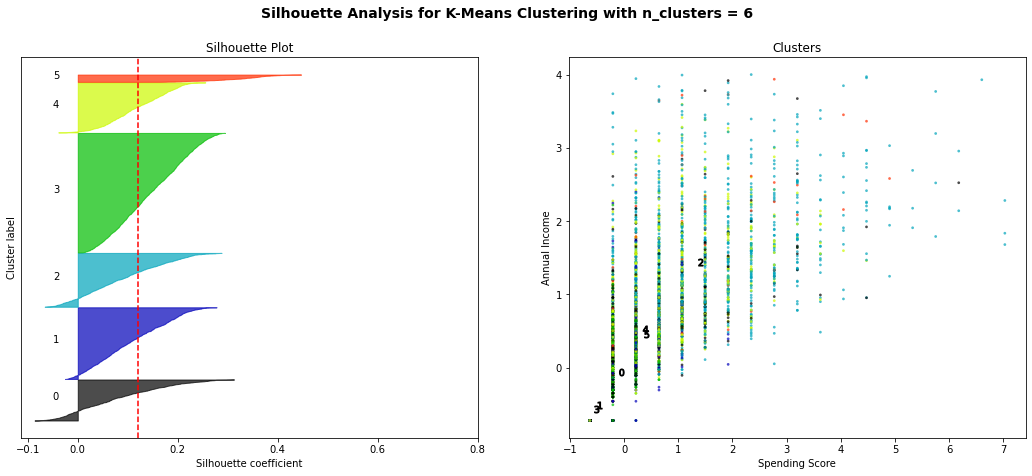

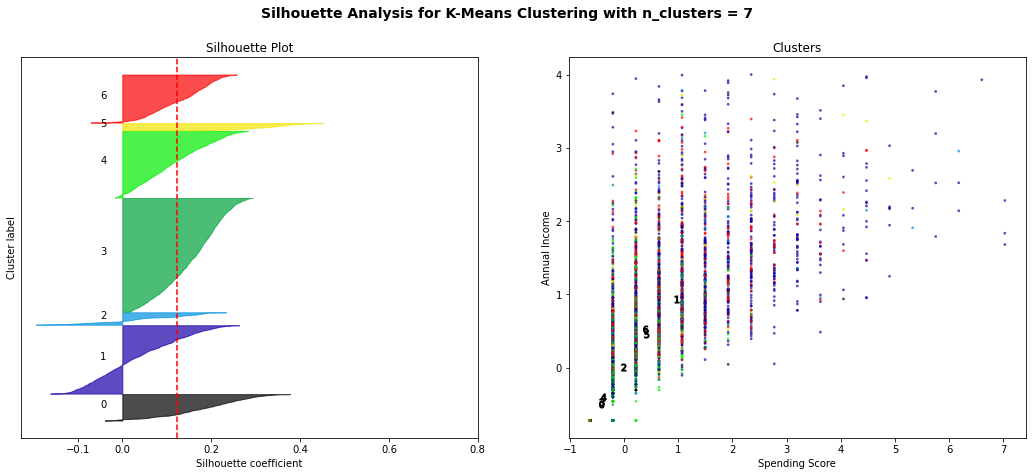

In [113]:
n_clusters = [2, 3, 4, 5, 6,7]
X = np.array(X)
for K in n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    model = KMeans(n_clusters = K, random_state = 10)
    cluster_labels = model.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(K):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / K)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10 
    ax1.set_title("Silhouette Plot")
    ax1.set_xlabel("Silhouette coefficient")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8])
    colors = cm.nipy_spectral(cluster_labels.astype(float) / K)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')
    centers = model.cluster_centers_
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
    ax2.set_title("Clusters")
    ax2.set_xlabel("Spending Score")
    ax2.set_ylabel("Annual Income")
    plt.suptitle(("Silhouette Analysis for K-Means Clustering with n_clusters = %d" % K), fontsize=14, 
                 fontweight='bold')
plt.show()

Let us build the 5 clusters using K-menas clustering.

In [114]:
new_clusters = KMeans(n_clusters = 5, random_state = 10)
new_clusters.fit(X)
df['Cluster'] = new_clusters.labels_

In [115]:
# head() to display top five rows
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Cluster
1,0,0.0,0,0.0,2,8.000000,0.000000,0.316228,0.0,0.0,2,2,2,1,2,2,0,0,1
4,0,0.0,0,0.0,10,25.049950,0.141421,0.223607,0.0,0.0,2,3,3,1,4,2,1,0,1
5,0,0.0,0,0.0,19,12.418400,0.125656,0.156721,0.0,0.0,2,2,2,1,3,2,0,0,1
8,0,0.0,0,0.0,2,6.082763,0.000000,0.316228,0.0,0.8,2,2,2,2,3,2,0,0,4
9,0,0.0,0,0.0,3,27.166155,0.000000,0.149071,0.0,0.4,2,2,4,1,2,2,0,0,1


#### Check the size of each cluster

In [116]:
df.Cluster.value_counts()

1    3412
3    1802
2    1081
4     592
0     150
Name: Cluster, dtype: int64

**Plot a barplot to visualize the cluster sizes**

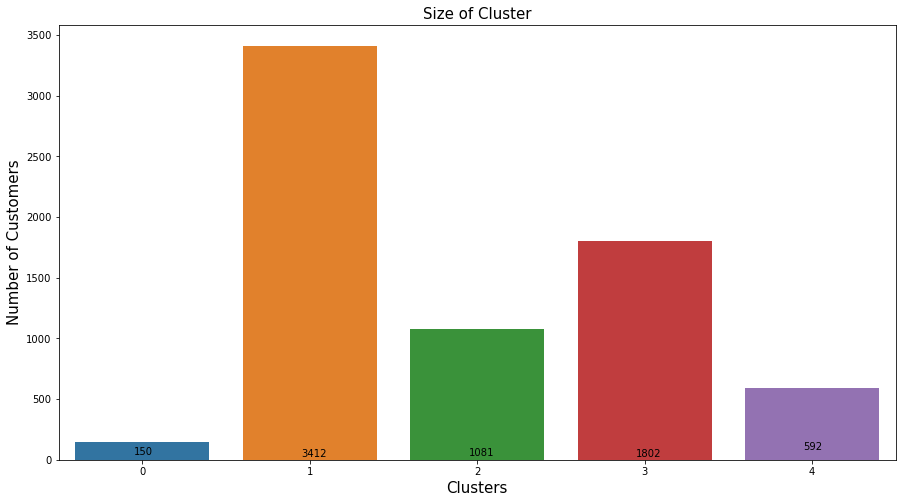

In [117]:
sns.countplot(data= df, x = 'Cluster')
plt.title('Size of Cluster', fontsize = 15)
plt.xlabel('Clusters', fontsize = 15)
plt.ylabel('Number of Customers', fontsize = 15)
plt.text(x = -0.05, y =39, s = np.unique(new_clusters.labels_, return_counts=True)[1][0])
plt.text(x = 0.95, y =24, s = np.unique(new_clusters.labels_, return_counts=True)[1][1])
plt.text(x = 1.95, y =37, s = np.unique(new_clusters.labels_, return_counts=True)[1][2])
plt.text(x = 2.95, y =22, s = np.unique(new_clusters.labels_, return_counts=True)[1][3])
plt.text(x = 3.95, y =81, s = np.unique(new_clusters.labels_, return_counts=True)[1][4])
plt.show()

The 1st cluster is the largest cluster containing as 3412 is the highest in this cluster observations.

**Interpretaion: from the above cluster centroid we can interpret that cluster 1 has high importance because it has highest number of customers.

	Perform PCA and apply clustering on top of it. Comment whether PCA is really helping the clustering process.  


In [120]:
cov_mat = np.cov(X.T)
print(cov_mat[0:5])

[[ 1.00014213e+00  8.09571204e-01  5.90545879e-02  0.00000000e+00
   2.09266998e-01  1.45489380e-01 -7.89737836e-02 -3.02323727e-01
   0.00000000e+00 -1.00019518e-01  2.08512546e-02 -1.64291820e-03
  -4.00855471e-03  1.92030727e-02 -1.06414748e-02 -1.70959791e-01
   2.85930980e-02  6.43447116e-02]
 [ 8.09571204e-01  1.00014213e+00  6.78156972e-02  0.00000000e+00
   1.68901642e-01  1.50297861e-01 -9.37236540e-02 -3.32509680e-01
   0.00000000e+00 -1.22008832e-01  2.39597408e-02 -1.38038354e-02
  -2.10617122e-02  3.55169981e-02 -4.34148635e-03 -2.22102794e-01
   2.89793761e-02  4.80728846e-02]
 [ 5.90545879e-02  6.78156972e-02  1.00014213e+00  0.00000000e+00
   6.49926670e-02  6.72800453e-02  3.45043585e-02  2.47926418e-02
   0.00000000e+00 -1.25928950e-02 -1.43918053e-02 -3.58313984e-04
  -4.28695965e-03 -1.72914960e-02 -2.27851807e-02  2.30077860e-02
  -2.82225588e-03  4.26623234e-02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.

In [121]:
eig_val, eig_vec = np.linalg.eig(cov_mat)

print('Eigenvalues:','\n','\n', eig_val,"\n")

print('Eigenvectors:','\n','\n',eig_vec,'\n')

Eigenvalues: 
 
 [2.5424147  1.81215741 0.17931604 0.24181036 0.35184105 1.37017845
 1.28591401 0.69894091 1.105088   0.76338425 0.84902059 0.8625099
 1.043962   0.9386656  0.98798463 0.96908611 0.         0.        ] 

Eigenvectors: 
 
 [[ 4.65256273e-01  9.77770242e-02  6.60630403e-01  2.03277322e-01
  -1.19520089e-01 -1.34983699e-01  4.52207147e-01  1.49319455e-01
  -6.15110485e-02 -3.63628216e-03 -6.44917652e-02  1.09018500e-01
   1.25468003e-01 -2.89657775e-02 -1.84260894e-02  1.29224820e-02
   0.00000000e+00  0.00000000e+00]
 [ 4.72321308e-01  1.31021234e-01 -6.63424328e-01 -2.72760630e-01
  -1.03054162e-02 -1.24593878e-01  4.42679307e-01  8.68202813e-02
  -6.10222383e-02  3.43001412e-04 -4.51644622e-02  5.85946269e-02
   1.26618962e-01 -1.72284267e-02 -1.76894643e-02  1.56257525e-02
   0.00000000e+00  0.00000000e+00]
 [ 5.69544058e-02 -9.60769046e-02  1.05423371e-02  1.54966605e-02
   4.17750370e-02 -3.51739055e-03  1.96817210e-01 -1.49156372e-02
  -2.25588794e-01  3.20490166e-0

**Interpretation:** For the 16x16 covariance matrix, we get 14 eigenvalues and eigenvectors. The eigenvector corresponding to the largest eigenvalue represent the direction of the highest variation in the dataset.

In [123]:
eig_val = list(eig_val)
eig_val.sort(reverse = True)
print(eig_val)

[2.54241470199126, 1.8121574137316059, 1.3701784525312808, 1.2859140087708036, 1.1050880003496657, 1.0439620011997786, 0.98798463207022, 0.969086114432984, 0.9386655969616752, 0.8625099018818664, 0.8490205872177277, 0.7633842531801897, 0.6989409087855591, 0.3518410469141018, 0.24181035886307595, 0.17931604044737723, 0.0, 0.0]


<ipython-input-124-af2a4b0dce24>:6: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s ='Elbow Point', xy=(2.05,1.2), xytext=(2, 1.8), arrowprops=dict(facecolor='black', arrowstyle = 'simple'))


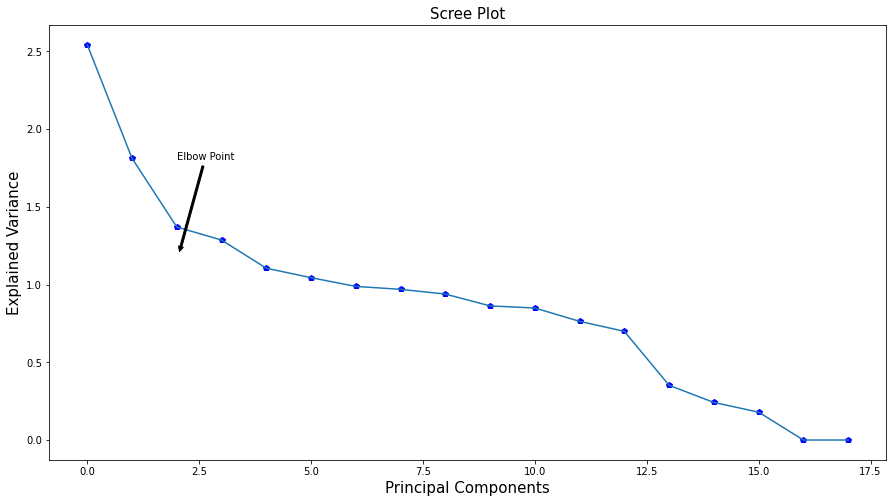

In [124]:
plt.plot(eig_val,'bp')            
plt.plot(eig_val) 
plt.title('Scree Plot', fontsize = 15)
plt.xlabel('Principal Components', fontsize = 15)    
plt.ylabel('Explained Variance', fontsize = 15)      
plt.annotate(s ='Elbow Point', xy=(2.05,1.2), xytext=(2, 1.8), arrowprops=dict(facecolor='black', arrowstyle = 'simple'))
plt.show()   

Interpretation: It can be observed that, after the elbow point, the principal components do not contribute much to the variance in the data. The Kaiser criterion considers the number of principal components as 2, but the scree plot shows that only first three components explains most of the variation.

In [125]:
percent_var = []
for i in eig_val:
    variation = (i/sum(eig_val))*100
    percent_var.append(variation)
    
# print the percentage of variation
percent_var

[15.887833809871482,
 11.324374345438018,
 8.562398387105734,
 8.03582045412762,
 6.905818504387741,
 6.5238352995254,
 6.174026459469647,
 6.055927509192903,
 5.865826293362178,
 5.3899208377511805,
 5.305624601804683,
 4.770473573056534,
 4.367759906756423,
 2.198694051164931,
 1.5110999759846184,
 1.120565991000911,
 0.0,
 0.0]

In [126]:
# the 'cumsum()' returns the cumulative sum 
np.cumsum(percent_var)

array([ 15.88783381,  27.21220816,  35.77460654,  43.810427  ,
        50.7162455 ,  57.2400808 ,  63.41410726,  69.47003477,
        75.33586106,  80.7257819 ,  86.0314065 ,  90.80188008,
        95.16963998,  97.36833403,  98.87943401, 100.        ,
       100.        , 100.        ])

In [127]:
# consider the eigenvectors corresponding to the first five highest eigenvalues
# these eigenvectors are the 1st, 2nd, 3rd,4th,5th and 6th columns of 'eig_vec' 
eigenvector = eig_vec[:,[0,1,2,3,4,5,6]]

# print the vectors
eigenvector

array([[ 4.65256273e-01,  9.77770242e-02,  6.60630403e-01,
         2.03277322e-01, -1.19520089e-01, -1.34983699e-01,
         4.52207147e-01],
       [ 4.72321308e-01,  1.31021234e-01, -6.63424328e-01,
        -2.72760630e-01, -1.03054162e-02, -1.24593878e-01,
         4.42679307e-01],
       [ 5.69544058e-02, -9.60769046e-02,  1.05423371e-02,
         1.54966605e-02,  4.17750370e-02, -3.51739055e-03,
         1.96817210e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 3.51498096e-01, -5.15705757e-01, -2.55225864e-01,
         6.30730801e-01, -2.97311545e-01,  1.48018479e-02,
        -1.92397799e-01],
       [ 3.32072571e-01, -5.24091466e-01,  2.35329506e-01,
        -6.76431481e-01, -9.49666442e-02, -3.84300235e-04,
        -2.25919123e-01],
       [-2.14590137e-01, -3.95084364e-01,  8.17633681e-03,
         1.04393508e-01,  5.57171004e-01, -1.21069532e-01,
         4.6565347

Interpretation: The first column in the above output represents the direction of maximum variation in the data. The second column represents the direction of the 2nd most highest variation in the data and so on.

In [130]:
# take the dot product of 'df_attr_std' with 'eigenvector' to obtain new dataset
# create a dataframe of principal components
# pass the required column names to the parameter 'columns'
df_pca = pd.DataFrame(X.dot(eigenvector), columns= ['PC1','PC2', 'PC3', 'PC4', 'PC5','PC6','PC7'])

# head() to display top five rows
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-2.160216,0.868937,-0.072266,-0.063265,-1.449339,0.701681,0.139157
1,-1.363420,-0.327758,0.146833,-0.322529,0.255855,-0.403552,-0.105026
2,-1.103977,-0.023878,-0.113403,0.636052,0.886836,0.580652,-0.221422
3,-2.724882,0.130885,-0.103469,-0.134102,-1.396043,0.230487,0.432873
4,-0.875051,0.067853,0.275798,-0.739148,0.270816,0.181790,-1.236195


In [131]:
# check the shape of the transformed data
df_pca.shape

(7037, 7)

**Interpretation**: In the above step, we obtained the data with reduced dimensions. The new dataset has 2233 observations and 5 columns, i.e. we have decreased the number of features from 14 to 5.